# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
!pip install textblob
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

#Scrapping the data

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

#Saving the data and saving it into a CSV file.

In [ ]:
df_raw = pd.DataFrame()
df_raw["reviews"] = reviews
df_raw.head()

,reviews
0,✅ Trip Verified | I recently flew from New Y...
1,Not Verified | BA business class in Europe h...
2,✅ Trip Verified | Our flight started in Seattl...
3,✅ Trip Verified | British Airways Flight fro...
4,✅ Trip Verified | British Airways World Trav...


In [ ]:
df_raw.to_csv("/content/BA_reviews.csv")

NameError: name 'df_raw' is not defined

In [ ]:
df_raw = pd.read_csv("/content/BA_reviews.csv")

#Cleaning the unnecessary text from the data.

Removing Verified or not verified from the data.

In [ ]:
# Remove "Trip Verified" and "Not Verified"
df_raw['reviews'] = df_raw['reviews'].str.replace('✅ Trip Verified |', '', regex=False)
df_raw['reviews'] = df_raw['reviews'].str.replace('Not Verified |', '', regex=False)

# Strip leading and trailing whitespace
df_raw['reviews'] = df_raw['reviews'].str.strip()


In [ ]:
df_raw.head()

,Unnamed: 0,reviews
0,0,I recently flew from New York back to London w...
1,1,BA business class in Europe has a seat the sam...
2,2,Our flight started in Seattle Wa heading to Li...
3,3,British Airways Flight from Edinburgh got dela...
4,4,British Airways World Traveller Plus (Premium ...


Removing character '|' from the data.

In [ ]:
df_raw['reviews'] = df_raw['reviews'].str.replace('|', '', regex=False)

# Strip leading and trailing whitespace
df_raw['reviews'] = df_raw['reviews'].str.strip()

In [ ]:
df_raw.head()

,Unnamed: 0,reviews
0,0,I recently flew from New York back to London w...
1,1,BA business class in Europe has a seat the sam...
2,2,Our flight started in Seattle Wa heading to Li...
3,3,British Airways Flight from Edinburgh got dela...
4,4,British Airways World Traveller Plus (Premium ...


Loading raw dataframe into new dataframe to introduce new features and manipulate data.

In [ ]:
df = df_raw.copy()

Applying sentiment score and introducing a new feature too the dataframe.

In [ ]:
# Function to categorize sentiment
def get_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment_score_tb'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_label_tb'] = df['sentiment_score_tb'].apply(get_sentiment)


In [ ]:
df.head()

,Unnamed: 0,reviews,sentiment_score_tb,sentiment_label_tb
0,0,I recently flew from New York back to London w...,0.180978,positive
1,1,BA business class in Europe has a seat the sam...,0.006169,positive
2,2,Our flight started in Seattle Wa heading to Li...,0.028576,positive
3,3,British Airways Flight from Edinburgh got dela...,-0.085714,negative
4,4,British Airways World Traveller Plus (Premium ...,0.175119,positive


In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment label
def get_vader_sentiment(review):
    score = analyzer.polarity_scores(review)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment_score_vader'] = df['reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['sentiment_label_vader'] = df['reviews'].apply(get_vader_sentiment)

In [ ]:
df.head()

,Unnamed: 0,reviews,sentiment_score_tb,sentiment_label_tb,sentiment_score_vader,sentiment_label_vader
0,0,I recently flew from New York back to London w...,0.180978,positive,0.9827,positive
1,1,BA business class in Europe has a seat the sam...,0.006169,positive,-0.3326,negative
2,2,Our flight started in Seattle Wa heading to Li...,0.028576,positive,0.6474,positive
3,3,British Airways Flight from Edinburgh got dela...,-0.085714,negative,-0.7535,negative
4,4,British Airways World Traveller Plus (Premium ...,0.175119,positive,0.9747,positive


In [ ]:
df = df.drop(columns = ['sentiment_score_tb','sentiment_label_tb'])

In [ ]:
# Load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Function to truncate reviews
def truncate_review(review, max_length=510):
    tokens = sentiment_pipeline.tokenizer.tokenize(review)
    return sentiment_pipeline.tokenizer.convert_tokens_to_string(tokens[:max_length])

# Apply sentiment analysis with truncation
df['truncated_reviews'] = df['reviews'].apply(lambda x: truncate_review(x))
df['sentiment_hf'] = df['truncated_reviews'].apply(lambda x: sentiment_pipeline(x)[0])
df['sentiment_label_hf'] = df['sentiment_hf'].apply(lambda x: x['label'])
df['sentiment_score_hf'] = df['sentiment_hf'].apply(lambda x: x['score'])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Token indices sequence length is longer than the specified maximum sequence length for this model (599 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
df.head(15)

,Unnamed: 0,reviews,sentiment_score_vader,sentiment_label_vader,truncated_reviews,sentiment_hf,sentiment_label_hf,sentiment_score_hf
0,0,I recently flew from New York back to London w...,0.9827,positive,i recently flew from new york back to london w...,"{'label': 'POSITIVE', 'score': 0.9912669062614...",POSITIVE,0.991267
1,1,BA business class in Europe has a seat the sam...,-0.3326,negative,ba business class in europe has a seat the sam...,"{'label': 'NEGATIVE', 'score': 0.9995330572128...",NEGATIVE,0.999533
2,2,Our flight started in Seattle Wa heading to Li...,0.6474,positive,our flight started in seattle wa heading to li...,"{'label': 'NEGATIVE', 'score': 0.9994632601737...",NEGATIVE,0.999463
3,3,British Airways Flight from Edinburgh got dela...,-0.7535,negative,british airways flight from edinburgh got dela...,"{'label': 'NEGATIVE', 'score': 0.9991747736930...",NEGATIVE,0.999175
4,4,British Airways World Traveller Plus (Premium ...,0.9747,positive,british airways world traveller plus ( premium...,"{'label': 'NEGATIVE', 'score': 0.9919562339782...",NEGATIVE,0.991956
5,5,BA is barely a step above low cost airlines. T...,-0.7650,negative,ba is barely a step above low cost airlines. t...,"{'label': 'NEGATIVE', 'score': 0.9986026883125...",NEGATIVE,0.998603
6,6,Happy with the flight crew. Hadn't been on a p...,0.9100,positive,happy with the flight crew. hadn ' t been on a...,"{'label': 'POSITIVE', 'score': 0.9997326731681...",POSITIVE,0.999733
7,7,Horrible service from boarding to landing. I f...,-0.9246,negative,horrible service from boarding to landing. i f...,"{'label': 'NEGATIVE', 'score': 0.9993434548377...",NEGATIVE,0.999343
8,8,My wife and I are very disappointed with flyin...,-0.8265,negative,my wife and i are very disappointed with flyin...,"{'label': 'NEGATIVE', 'score': 0.9997738003730...",NEGATIVE,0.999774
9,9,We flew BA between Heathrow and Berlin one way...,0.9811,positive,we flew ba between heathrow and berlin one way...,"{'label': 'POSITIVE', 'score': 0.9951711297035...",POSITIVE,0.995171


In [ ]:
df.tail()

,Unnamed: 0,reviews,sentiment_score_vader,sentiment_label_vader,truncated_reviews,sentiment_hf,sentiment_label_hf,sentiment_score_hf
3864,3864,Flew LHR - VIE return operated by bmi but BA a...,0.9741,positive,flew lhr - vie return operated by bmi but ba a...,"{'label': 'POSITIVE', 'score': 0.9983497858047...",POSITIVE,0.998350
3865,3865,LHR to HAM. Purser addresses all club passenge...,0.8720,positive,lhr to ham. purser addresses all club passenge...,"{'label': 'POSITIVE', 'score': 0.9948673248291...",POSITIVE,0.994867
3866,3866,My son who had worked for British Airways urge...,0.6640,positive,my son who had worked for british airways urge...,"{'label': 'NEGATIVE', 'score': 0.7255969047546...",NEGATIVE,0.725597
3867,3867,London City-New York JFK via Shannon on A318 b...,0.9148,positive,london city - new york jfk via shannon on a318...,"{'label': 'POSITIVE', 'score': 0.9996764659881...",POSITIVE,0.999676
3868,3868,SIN-LHR BA12 B747-436 First Class. Old aircraf...,0.2244,positive,sin - lhr ba12 b747 - 436 first class. old air...,"{'label': 'NEGATIVE', 'score': 0.9902340173721...",NEGATIVE,0.990234


In [ ]:
#Length of the review
df['review_length'] = df['reviews'].str.len()

#List of positive words

In [ ]:
# List of keywords to track
positive_keywords = ['food', 'service', 'comfort', 'noise', 'clean', 'staff', 'entertainment']

# Create binary features for each keyword
for keyword in positive_keywords:
    df[keyword + '_present'] = df['reviews'].str.contains(keyword, case=False).astype(int)


In [ ]:
df.head(15)

,Unnamed: 0,reviews,sentiment_score_vader,sentiment_label_vader,truncated_reviews,sentiment_hf,sentiment_label_hf,sentiment_score_hf,review_length,food_present,service_present,comfort_present,noise_present,clean_present,staff_present,entertainment_present
0,0,I recently flew from New York back to London w...,0.9827,positive,i recently flew from new york back to london w...,"{'label': 'POSITIVE', 'score': 0.9912669062614...",POSITIVE,0.991267,2088,0,1,1,0,1,0,1
1,1,BA business class in Europe has a seat the sam...,-0.3326,negative,ba business class in europe has a seat the sam...,"{'label': 'NEGATIVE', 'score': 0.9995330572128...",NEGATIVE,0.999533,1033,0,0,0,0,0,0,0
2,2,Our flight started in Seattle Wa heading to Li...,0.6474,positive,our flight started in seattle wa heading to li...,"{'label': 'NEGATIVE', 'score': 0.9994632601737...",NEGATIVE,0.999463,2097,0,1,0,0,0,1,0
3,3,British Airways Flight from Edinburgh got dela...,-0.7535,negative,british airways flight from edinburgh got dela...,"{'label': 'NEGATIVE', 'score': 0.9991747736930...",NEGATIVE,0.999175,618,0,0,0,0,0,0,0
4,4,British Airways World Traveller Plus (Premium ...,0.9747,positive,british airways world traveller plus ( premium...,"{'label': 'NEGATIVE', 'score': 0.9919562339782...",NEGATIVE,0.991956,614,0,0,0,0,0,0,1
5,5,BA is barely a step above low cost airlines. T...,-0.7650,negative,ba is barely a step above low cost airlines. t...,"{'label': 'NEGATIVE', 'score': 0.9986026883125...",NEGATIVE,0.998603,269,0,0,0,0,0,0,0
6,6,Happy with the flight crew. Hadn't been on a p...,0.9100,positive,happy with the flight crew. hadn ' t been on a...,"{'label': 'POSITIVE', 'score': 0.9997326731681...",POSITIVE,0.999733,242,0,0,1,0,0,0,0
7,7,Horrible service from boarding to landing. I f...,-0.9246,negative,horrible service from boarding to landing. i f...,"{'label': 'NEGATIVE', 'score': 0.9993434548377...",NEGATIVE,0.999343,330,1,1,1,0,0,1,0
8,8,My wife and I are very disappointed with flyin...,-0.8265,negative,my wife and i are very disappointed with flyin...,"{'label': 'NEGATIVE', 'score': 0.9997738003730...",NEGATIVE,0.999774,277,0,0,0,0,0,0,0
9,9,We flew BA between Heathrow and Berlin one way...,0.9811,positive,we flew ba between heathrow and berlin one way...,"{'label': 'POSITIVE', 'score': 0.9951711297035...",POSITIVE,0.995171,944,0,0,0,0,1,1,0


#List of negative words

In [ ]:
# List of negative words
negative_keywords = ['bad', 'poor', 'disappointing', 'not', 'worse']

# Count negative mentions
df['negative_count'] = df['reviews'].apply(lambda x: sum(word in x.lower() for word in negative_keywords))


In [ ]:
def categorize_review(row):
    if row['sentiment_label_hf'] == 'positive' and row['food_present']:
        return 'Positive Food Experience'
    elif row['sentiment_label_hf'] == 'negative' and row['noise_present']:
        return 'Noise Complaint'
    else:
        return 'Other'

df['review_category'] = df.apply(categorize_review, axis=1)


In [ ]:
df.head(15)

,Unnamed: 0,reviews,sentiment_score_vader,sentiment_label_vader,truncated_reviews,sentiment_hf,sentiment_label_hf,sentiment_score_hf,review_length,food_present,service_present,comfort_present,noise_present,clean_present,staff_present,entertainment_present,negative_count,review_category
0,0,I recently flew from New York back to London w...,0.9827,positive,i recently flew from new york back to london w...,"{'label': 'POSITIVE', 'score': 0.9912669062614...",POSITIVE,0.991267,2088,0,1,1,0,1,0,1,1,Other
1,1,BA business class in Europe has a seat the sam...,-0.3326,negative,ba business class in europe has a seat the sam...,"{'label': 'NEGATIVE', 'score': 0.9995330572128...",NEGATIVE,0.999533,1033,0,0,0,0,0,0,0,1,Other
2,2,Our flight started in Seattle Wa heading to Li...,0.6474,positive,our flight started in seattle wa heading to li...,"{'label': 'NEGATIVE', 'score': 0.9994632601737...",NEGATIVE,0.999463,2097,0,1,0,0,0,1,0,1,Other
3,3,British Airways Flight from Edinburgh got dela...,-0.7535,negative,british airways flight from edinburgh got dela...,"{'label': 'NEGATIVE', 'score': 0.9991747736930...",NEGATIVE,0.999175,618,0,0,0,0,0,0,0,1,Other
4,4,British Airways World Traveller Plus (Premium ...,0.9747,positive,british airways world traveller plus ( premium...,"{'label': 'NEGATIVE', 'score': 0.9919562339782...",NEGATIVE,0.991956,614,0,0,0,0,0,0,1,1,Other
5,5,BA is barely a step above low cost airlines. T...,-0.7650,negative,ba is barely a step above low cost airlines. t...,"{'label': 'NEGATIVE', 'score': 0.9986026883125...",NEGATIVE,0.998603,269,0,0,0,0,0,0,0,1,Other
6,6,Happy with the flight crew. Hadn't been on a p...,0.9100,positive,happy with the flight crew. hadn ' t been on a...,"{'label': 'POSITIVE', 'score': 0.9997326731681...",POSITIVE,0.999733,242,0,0,1,0,0,0,0,0,Other
7,7,Horrible service from boarding to landing. I f...,-0.9246,negative,horrible service from boarding to landing. i f...,"{'label': 'NEGATIVE', 'score': 0.9993434548377...",NEGATIVE,0.999343,330,1,1,1,0,0,1,0,1,Other
8,8,My wife and I are very disappointed with flyin...,-0.8265,negative,my wife and i are very disappointed with flyin...,"{'label': 'NEGATIVE', 'score': 0.9997738003730...",NEGATIVE,0.999774,277,0,0,0,0,0,0,0,1,Other
9,9,We flew BA between Heathrow and Berlin one way...,0.9811,positive,we flew ba between heathrow and berlin one way...,"{'label': 'POSITIVE', 'score': 0.9951711297035...",POSITIVE,0.995171,944,0,0,0,0,1,1,0,1,Other


In [ ]:
df.describe()

,Unnamed: 0,sentiment_score_vader,sentiment_score_hf,review_length,food_present,service_present,comfort_present,noise_present,clean_present,staff_present,entertainment_present,negative_count
count,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000,3869.000000
mean,1934.000000,0.150771,0.978249,891.335487,0.449987,0.496769,0.245025,0.009305,0.095890,0.302404,0.145516,1.020936
std,1117.028424,0.780743,0.066732,580.494771,0.497557,0.500054,0.430157,0.096024,0.294479,0.459359,0.352666,0.778011
min,0.000000,-0.997500,0.511858,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,967.000000,-0.735600,0.993272,479.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1934.000000,0.446200,0.998611,744.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2901.000000,0.928300,0.999471,1126.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,3868.000000,0.999200,0.999886,3536.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3869 entries, 0 to 3868
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3869 non-null   int64  
 1   reviews                3869 non-null   object 
 2   sentiment_score_vader  3869 non-null   float64
 3   sentiment_label_vader  3869 non-null   object 
 4   truncated_reviews      3869 non-null   object 
 5   sentiment_hf           3869 non-null   object 
 6   sentiment_label_hf     3869 non-null   object 
 7   sentiment_score_hf     3869 non-null   float64
 8   review_length          3869 non-null   int64  
 9   food_present           3869 non-null   int64  
 10  service_present        3869 non-null   int64  
 11  comfort_present        3869 non-null   int64  
 12  noise_present          3869 non-null   int64  
 13  clean_present          3869 non-null   int64  
 14  staff_present          3869 non-null   int64  
 15  ente

Now that we have our dataset. Let's look deeper into it with the help of Visualizations.

#Visualizations

#Word Cloud of Reviews

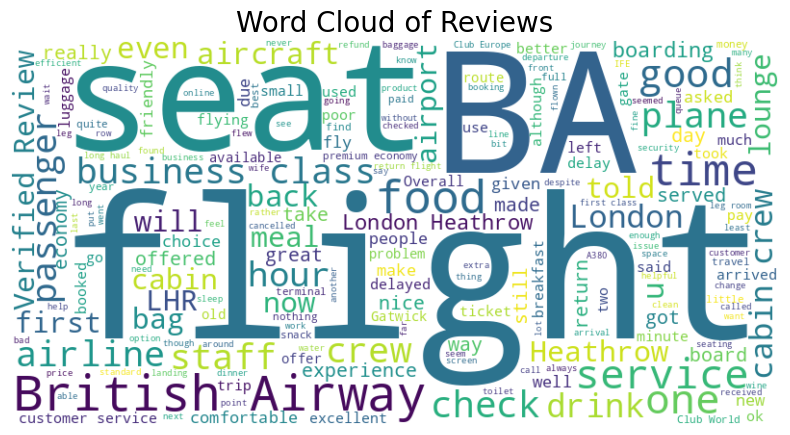

In [ ]:
# Combine all reviews into a single string
all_reviews = ' '.join(df['reviews'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews', fontsize=20)
plt.show()


#Sentiment score distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

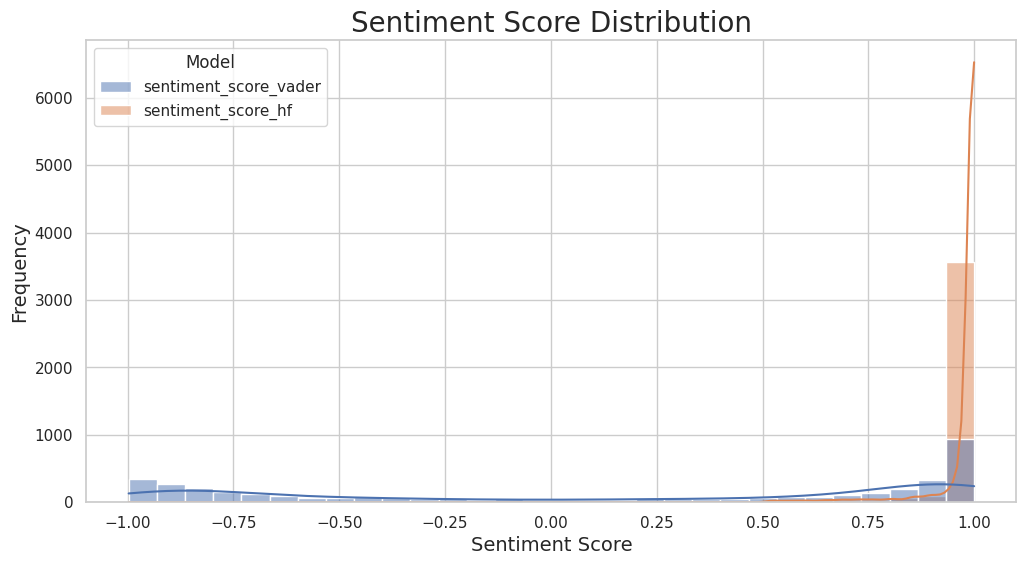

In [ ]:
# Set the style for seaborn
sns.set(style='whitegrid')

# Create a combined DataFrame for visualization
melted_df = df.melt(id_vars='reviews', value_vars=['sentiment_score_vader', 'sentiment_score_hf'],
                    var_name='Model', value_name='Sentiment Score')

# Plot sentiment score distributions
plt.figure(figsize=(12, 6))
sns.histplot(melted_df, x='Sentiment Score', hue='Model', bins=30, kde=True)
plt.title('Sentiment Score Distribution', fontsize=20)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

#Correlation Heatmap

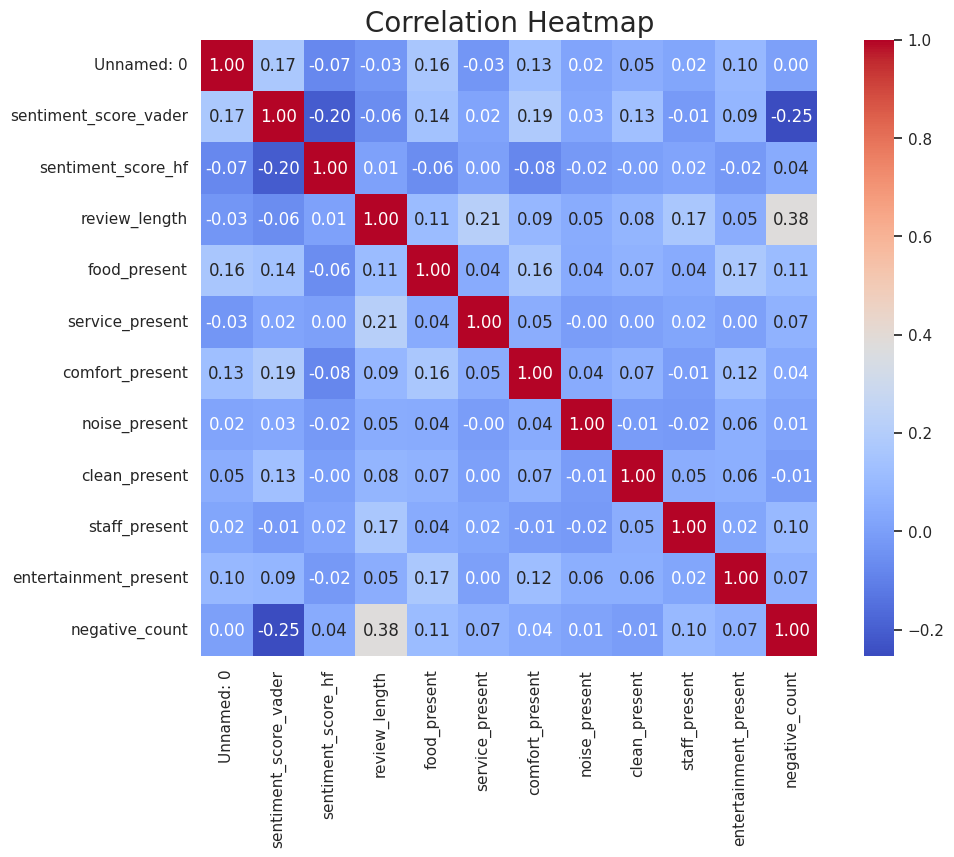

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap', fontsize=20)
plt.show()


#3D Scatter plot

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='review_length', y='negative_count', z='sentiment_score_hf',
                    color='sentiment_label_hf',
                    title='3D Scatter Plot of Review Length, Negative Count, and Sentiment Score',
                    labels={'review_length': 'Review Length', 'negative_count': 'Negative Count', 'sentiment_score_hf': 'Sentiment Score'},
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.show()


#Count of Review Categories

<ipython-input-29-7d6ebd6f0216>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



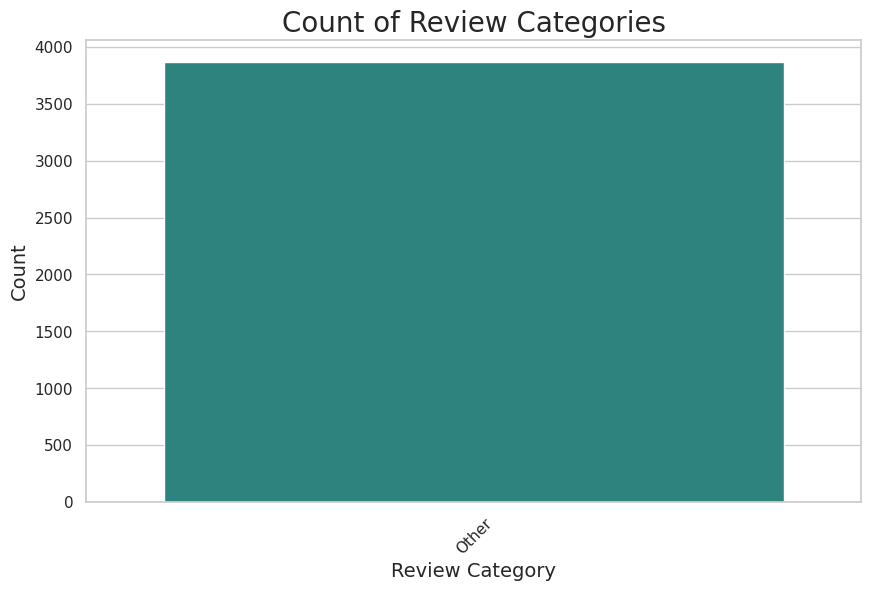

In [ ]:
category_counts = df['review_category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Count of Review Categories', fontsize=20)
plt.xlabel('Review Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create word count column
df['word_count'] = df['reviews'].apply(lambda x: len(x.split()))


<ipython-input-35-723317ef0608>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



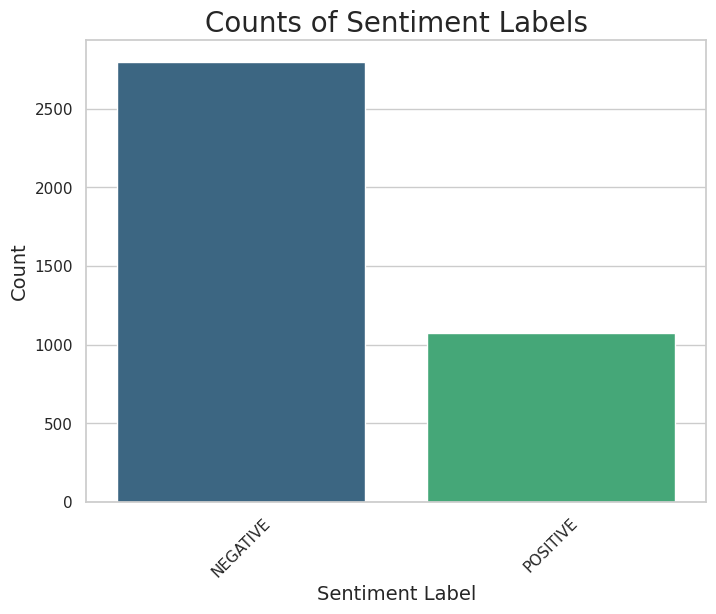

In [ ]:
# Count the occurrences of each sentiment label
sentiment_counts = df['sentiment_label_hf'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Counts of Sentiment Labels', fontsize=20)
plt.xlabel('Sentiment Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

#Sentiment Score Vs. Word Count

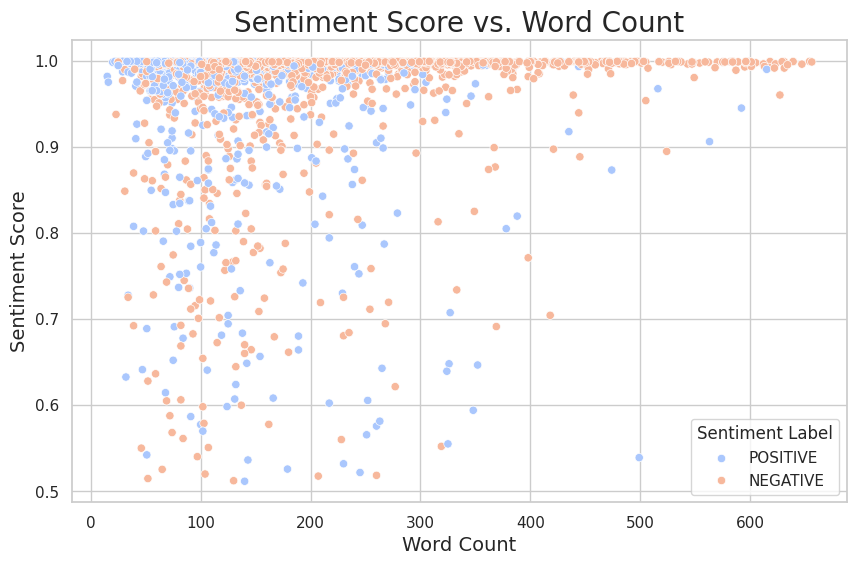

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='word_count', y='sentiment_score_hf', hue='sentiment_label_hf', palette='coolwarm')
plt.title('Sentiment Score vs. Word Count', fontsize=20)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.legend(title='Sentiment Label')
plt.show()


#Box Plot of Sentiment Scores by Review Category

<ipython-input-31-0d6b9b467863>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



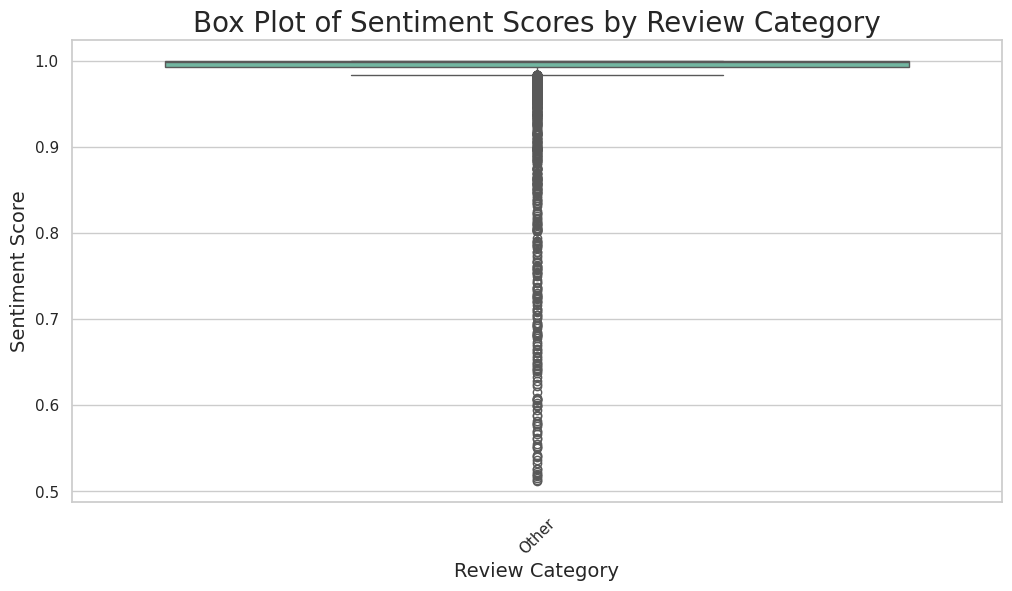

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_category', y='sentiment_score_hf', data=df, palette='Set2')
plt.title('Box Plot of Sentiment Scores by Review Category', fontsize=20)
plt.xlabel('Review Category', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.to_csv("/content/BA_reviews_cleaned.csv")

In [ ]:
!pip install python-pptx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 14.7 MB/s eta 0:00:00


In [ ]:
from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
prs = Presentation()

# Add a slide
slide_layout = prs.slide_layouts[5]  # Using a title-only layout
slide = prs.slides.add_slide(slide_layout)

# Title
title = slide.shapes.title
title.text = "Customer Review Sentiment Analysis"

# Add metrics
content = slide.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(3))
text_frame = content.text_frame
text_frame.add_paragraph().text = "Total Reviews Analyzed: 3,869"
text_frame.add_paragraph().text = "Positive Reviews: X% (count)"
text_frame.add_paragraph().text = "Negative Reviews: Y% (count)"
text_frame.add_paragraph().text = "Average Sentiment Score: Z"
text_frame.add_paragraph().text = "Average Review Length: A words"

# Save the presentation
prs.save('Customer_Review_Sentiment_Analysis.pptx')


##PART II - Machine Learning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle
import seaborn as  sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df_ml_raw = pd.read_csv('/content/customer_booking.csv', encoding='ISO-8859-1')

In [3]:
df_ml_raw.head(15)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [4]:
df_ml_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

<ipython-input-5-6d5b0ba0c669>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking_complete', data=df_ml_raw, palette='viridis')


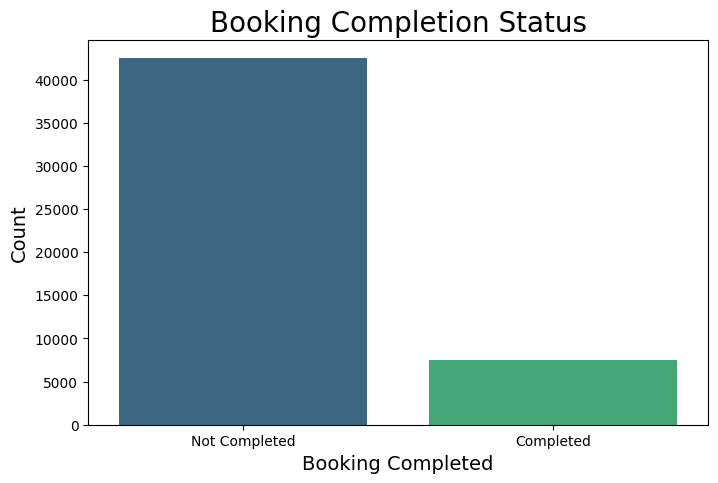

In [5]:
# Count of booking_complete
plt.figure(figsize=(8, 5))
sns.countplot(x='booking_complete', data=df_ml_raw, palette='viridis')
plt.title('Booking Completion Status', fontsize=20)
plt.xlabel('Booking Completed', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Not Completed', 'Completed'])
plt.show()

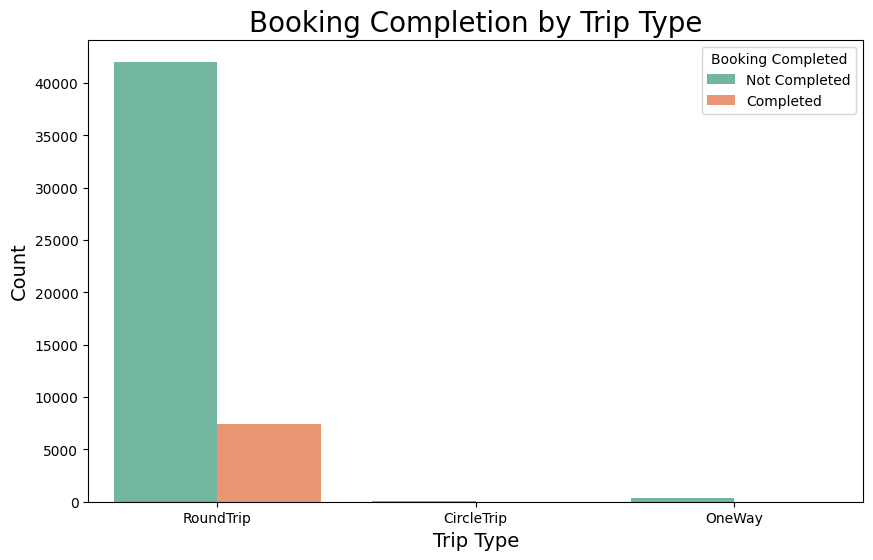

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='trip_type', hue='booking_complete', data=df_ml_raw, palette='Set2')
plt.title('Booking Completion by Trip Type', fontsize=20)
plt.xlabel('Trip Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Booking Completed', loc='upper right', labels=['Not Completed', 'Completed'])
plt.show()


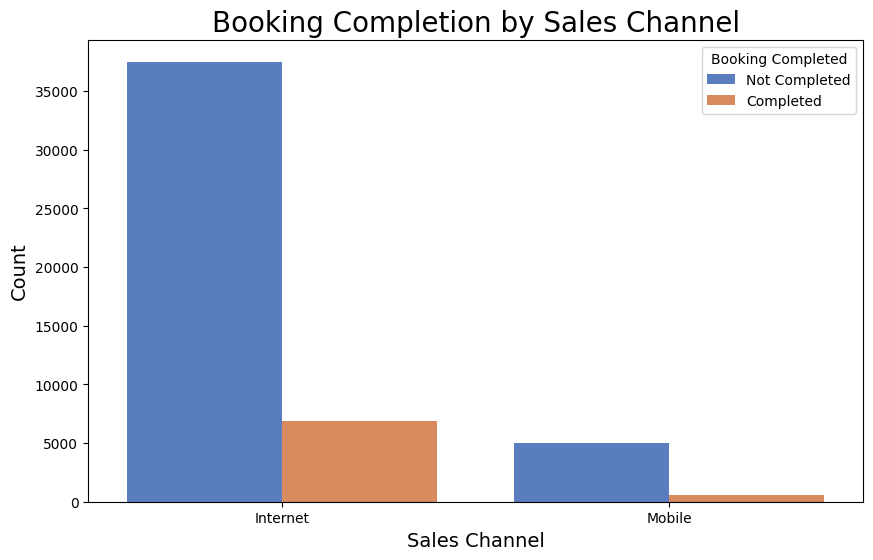

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sales_channel', hue='booking_complete', data=df_ml_raw, palette='muted')
plt.title('Booking Completion by Sales Channel', fontsize=20)
plt.xlabel('Sales Channel', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Booking Completed', loc='upper right', labels=['Not Completed', 'Completed'])
plt.show()


<ipython-input-8-88dbee7f7437>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flight_hour', y='booking_complete', data=df_ml_raw, palette='coolwarm')


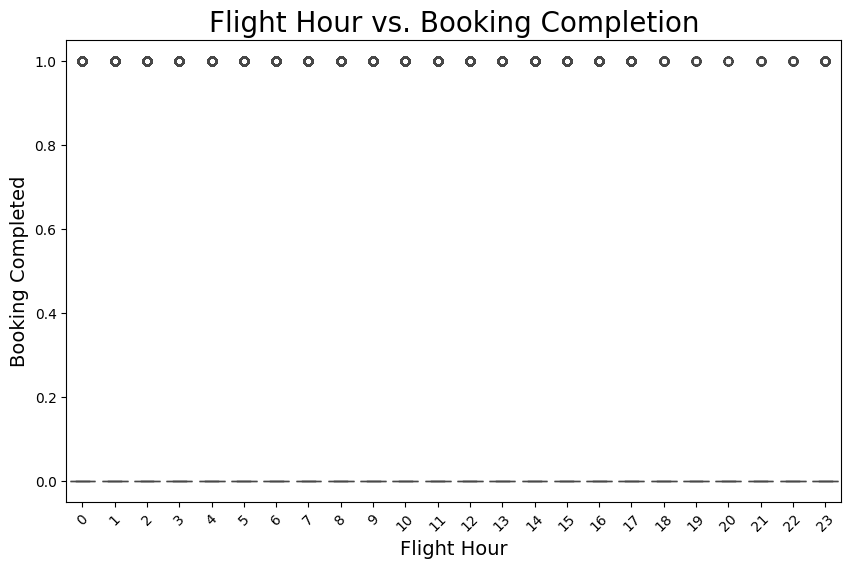

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='flight_hour', y='booking_complete', data=df_ml_raw, palette='coolwarm')
plt.title('Flight Hour vs. Booking Completion', fontsize=20)
plt.xlabel('Flight Hour', fontsize=14)
plt.ylabel('Booking Completed', fontsize=14)
plt.xticks(rotation=45)
plt.show()


<ipython-input-9-5593ab80fb04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='length_of_stay', y='booking_complete', data=df_ml_raw, palette='pastel')


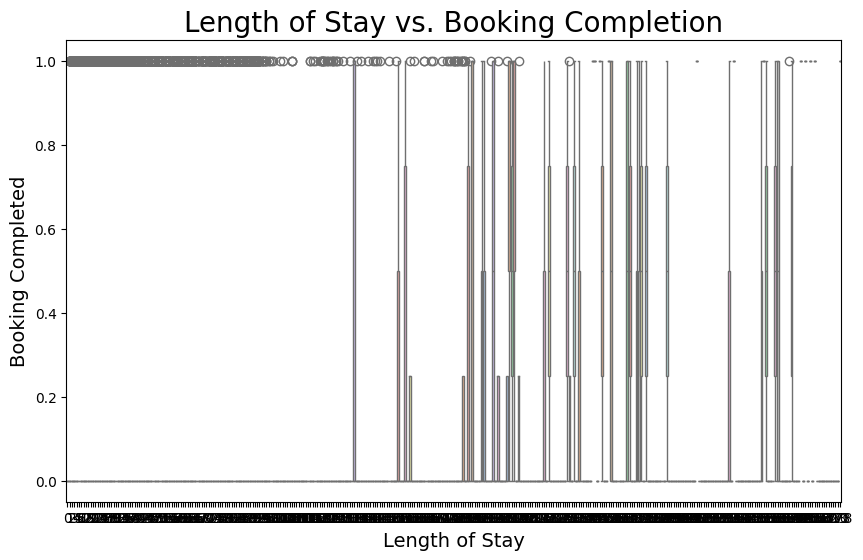

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='length_of_stay', y='booking_complete', data=df_ml_raw, palette='pastel')
plt.title('Length of Stay vs. Booking Completion', fontsize=20)
plt.xlabel('Length of Stay', fontsize=14)
plt.ylabel('Booking Completed', fontsize=14)
plt.show()


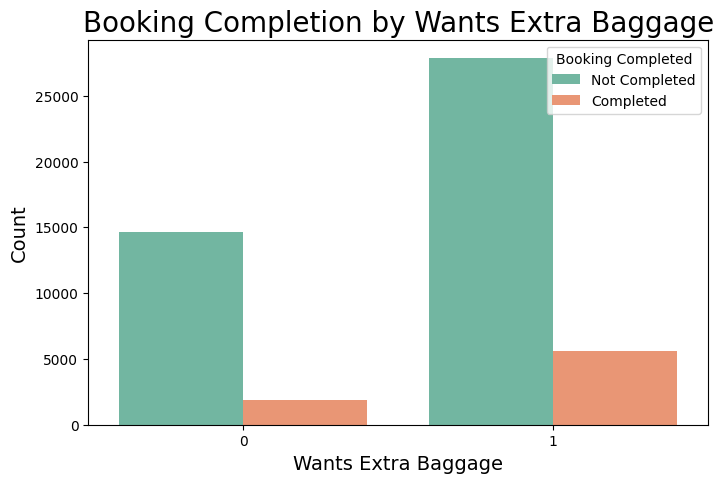

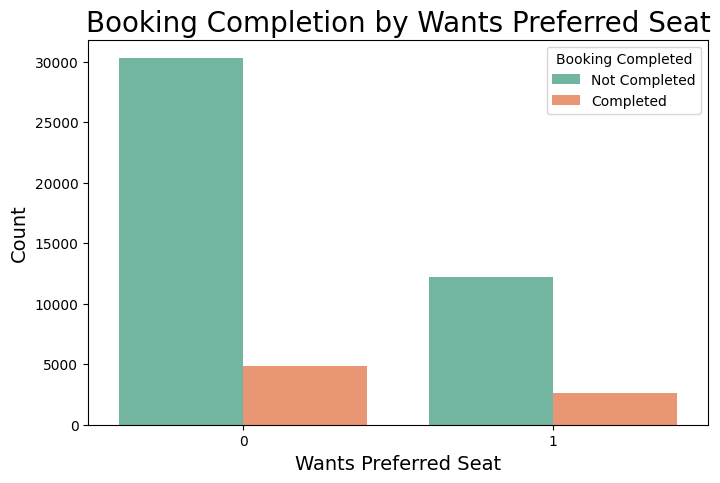

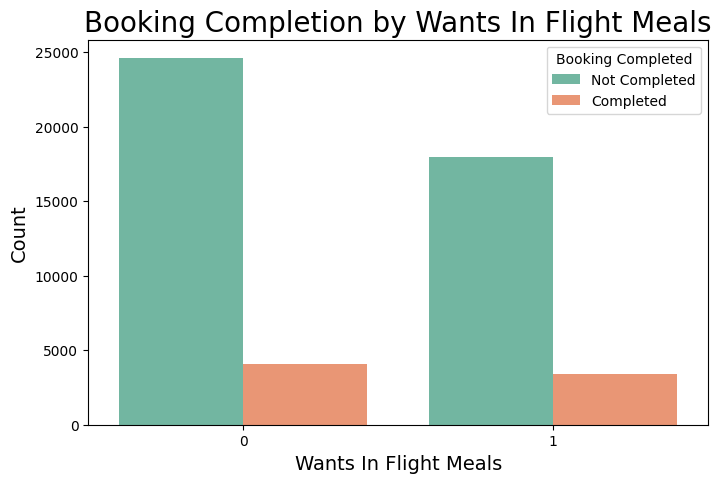

In [10]:
preferences = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']
for pref in preferences:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=pref, hue='booking_complete', data=df_ml_raw, palette='Set2')
    plt.title(f'Booking Completion by {pref.replace("_", " ").title()}', fontsize=20)
    plt.xlabel(pref.replace("_", " ").title(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Booking Completed', loc='upper right', labels=['Not Completed', 'Completed'])
    plt.show()


In [11]:
df = df_ml_raw.copy()

In [12]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [14]:
df.drop('route', axis='columns')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,Australia,1,0,1,5.62,0


In [17]:
df_safe = df.copy()

One ot encoding on categorical features.

In [18]:
data_encoded = pd.get_dummies(df, drop_first=True)


In [19]:
cov_matrix = data_encoded.cov()


In [21]:
unique_sales_channels = df_safe['sales_channel'].unique()
print(unique_sales_channels)


['Internet' 'Mobile']


In [22]:
value_counts = df_safe['sales_channel'].value_counts()


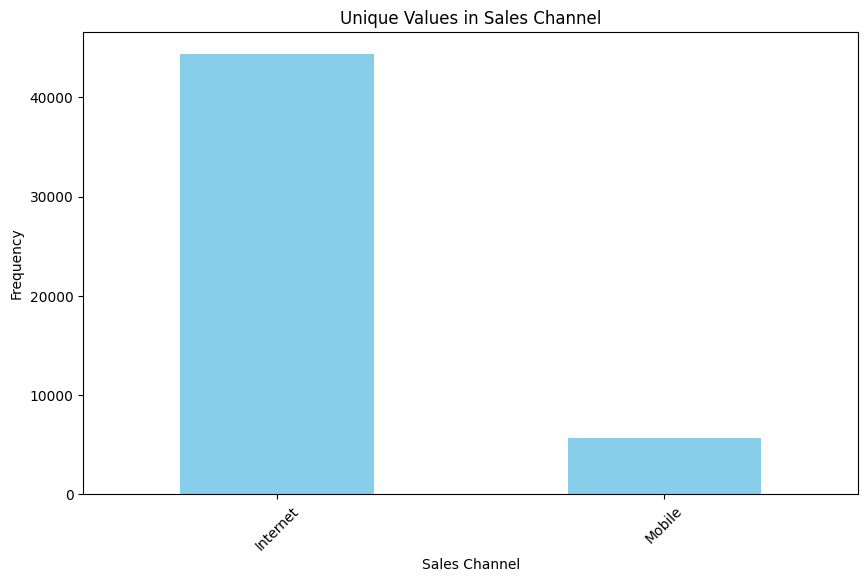

In [23]:

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Values in Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [30]:
value_counts = df_safe['booking_origin'].value_counts()

In [35]:
print(value_counts)

booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
               ...  
Estonia            1
Afghanistan        1
Czechia            1
Malta              1
Vanuatu            1
Name: count, Length: 104, dtype: int64


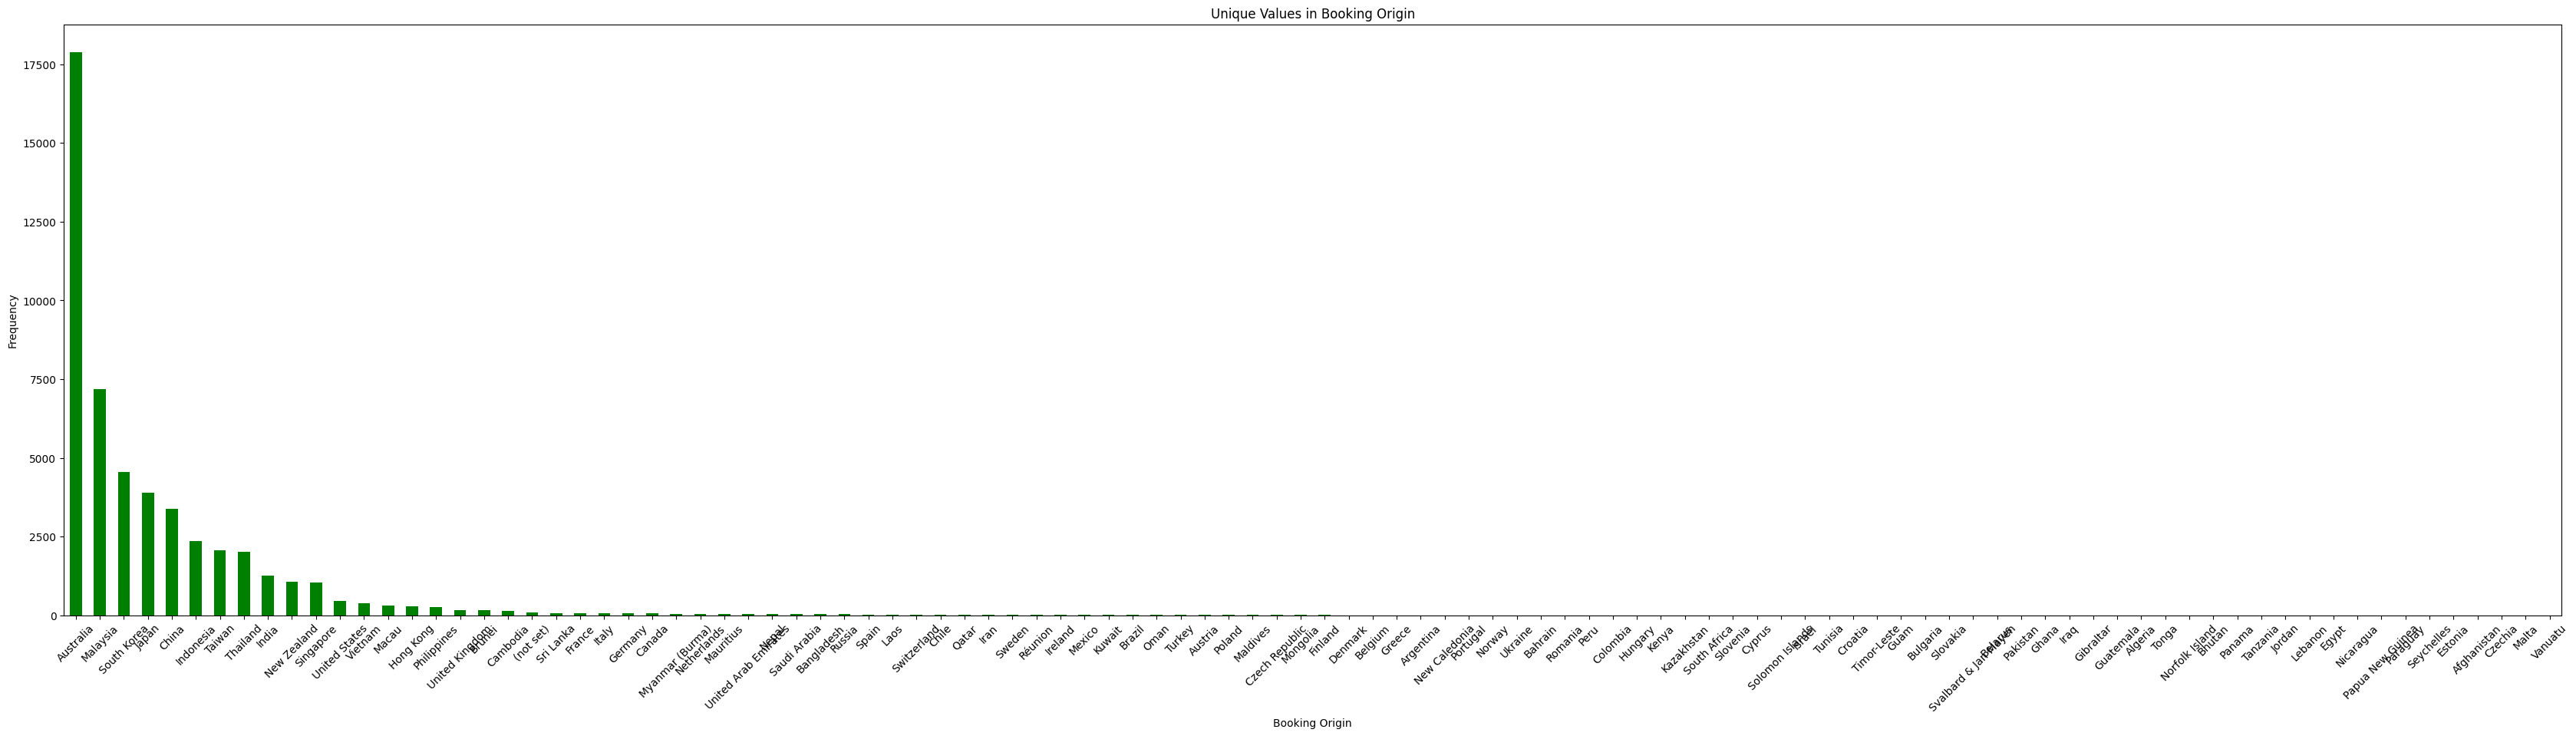

In [37]:

plt.figure(figsize=(42, 10))
value_counts.plot(kind='bar', color='green')
plt.title('Unique Values in Booking Origin')
plt.xlabel('Booking Origin')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64


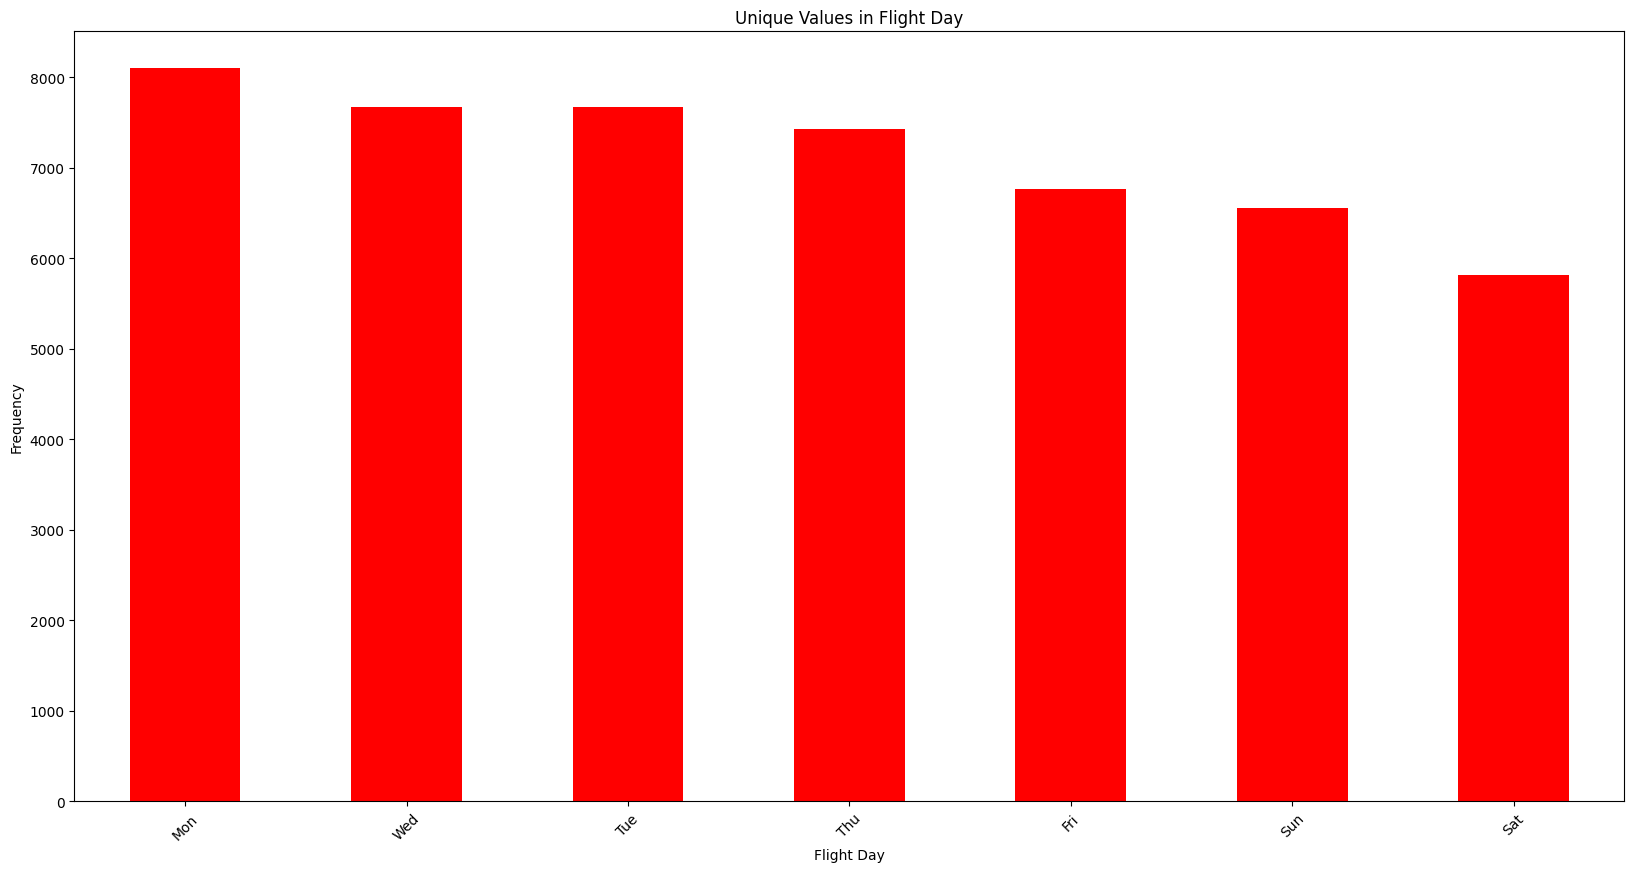

In [41]:
value_counts = df_safe['flight_day'].value_counts()
print(value_counts)

plt.figure(figsize=(20, 10))
value_counts.plot(kind='bar', color='red')
plt.title('Unique Values in Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
AKLHGH       1
MELVTE       1
MELWUH       1
URTXIY       1
MRUXIY       1
Name: count, Length: 799, dtype: int64


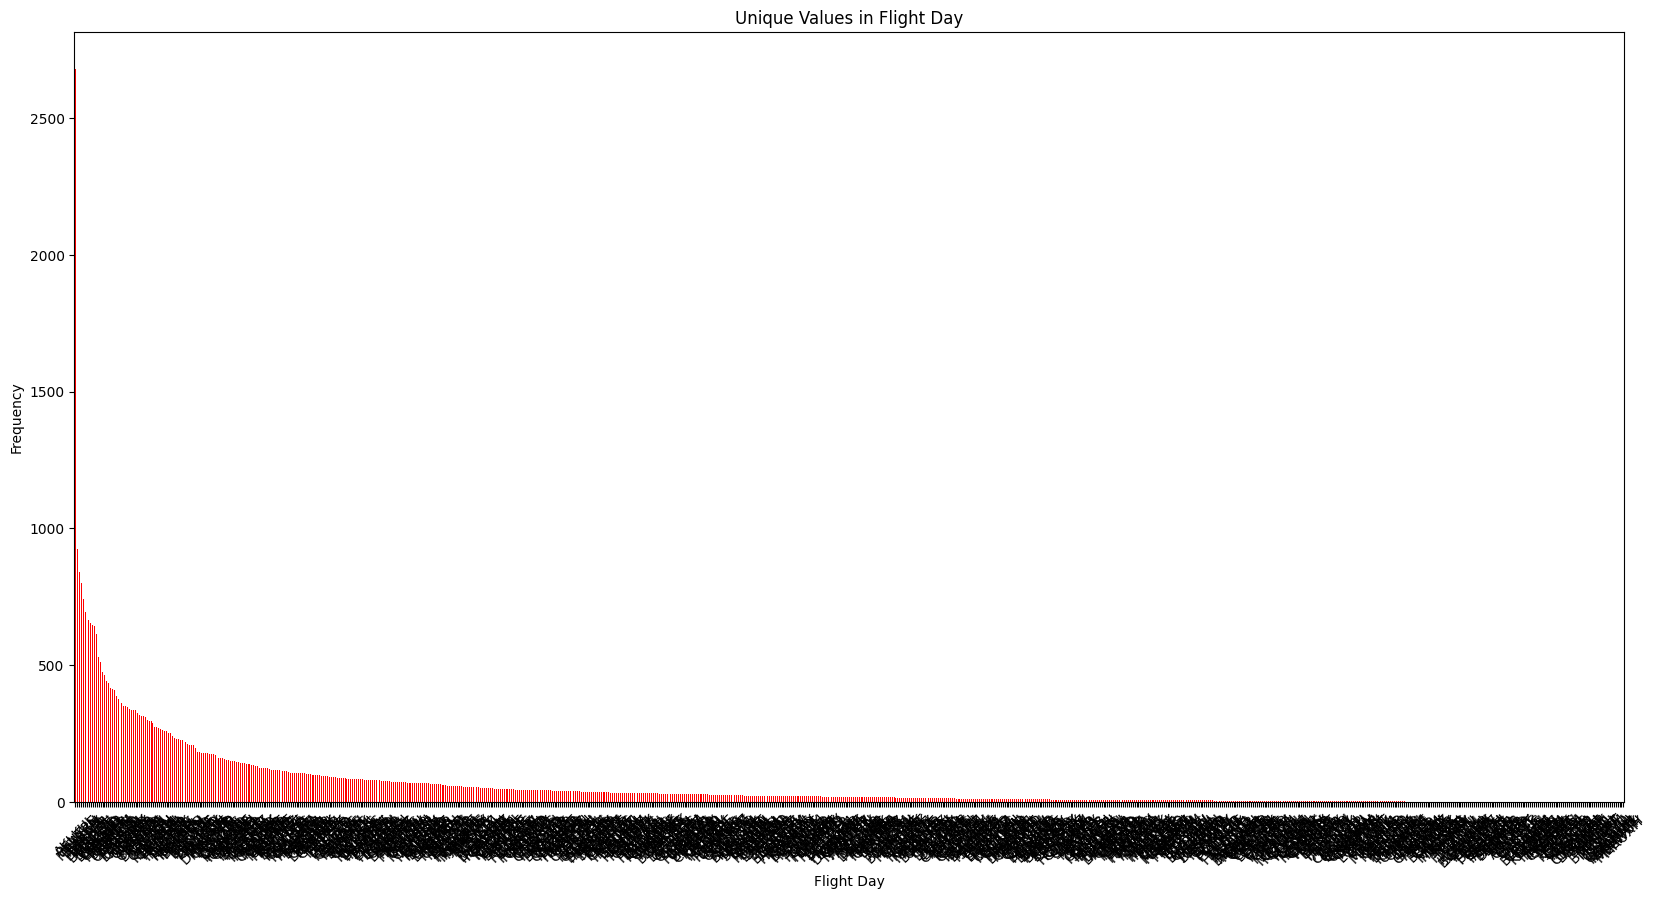

In [85]:
value_counts = df['route'].value_counts()
print(value_counts)

plt.figure(figsize=(20, 10))
value_counts.plot(kind='bar', color='red')
plt.title('Unique Values in Flight Day')
plt.xlabel('Flight Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


<ipython-input-71-dd60f7f83201>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='booking_origin', y='booking_complete', data=mean_booking, palette='viridis')


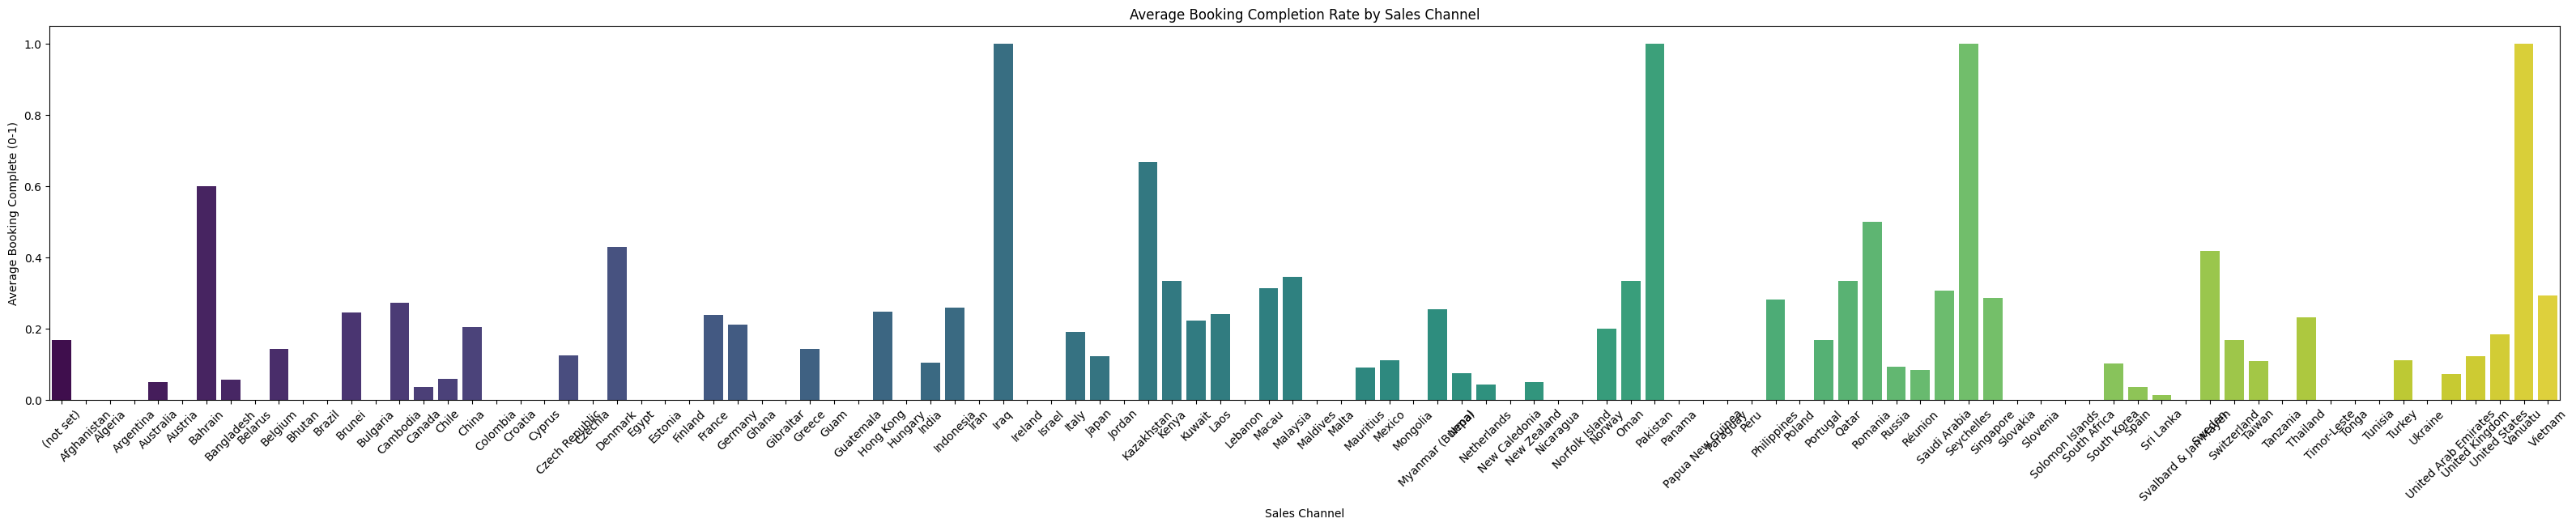

In [71]:
# Calculate the mean booking_complete for each booking_origin
mean_booking = df_safe.groupby('booking_origin')['booking_complete'].mean().reset_index()

plt.figure(figsize=(40, 6))
sns.barplot(x='booking_origin', y='booking_complete', data=mean_booking, palette='viridis')
plt.title('Average Booking Completion Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Booking Complete (0-1)')
plt.xticks(rotation=45)
plt.show()


In [73]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_safe['booking_origin'], df_safe['booking_complete'])

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant association between booking origin and booking completion.")
else:
    print("There is no significant association between booking origin and booking completion.")


Chi-Squared Statistic: 4677.602101395132
P-Value: 0.0
There is a significant association between booking origin and booking completion.


In [76]:
df = df_safe.copy()


When dealing with a categorical variable like booking_origin that has a high cardinality (100+ unique values), one-hot encoding can indeed lead to a very high-dimensional feature space. Here are some strategies you can use to manage this issue:

1. Frequency or Count Encoding
Instead of one-hot encoding, you can replace each unique value with its frequency or count in the dataset. This way, you reduce dimensionality while still capturing the importance of each category.

2. Target Encoding
You can also replace each category with the mean of the target variable (e.g., booking_complete). This approach can be effective but requires careful handling to avoid leakage.

3. Grouping Rare Categories
If some categories have very few occurrences, consider grouping them into an "Other" category. This helps consolidate the categories and reduce dimensionality.

In [77]:
# Frequency encoding
freq_encoding = df['booking_origin'].value_counts()
df['booking_origin_encoded'] = df['booking_origin'].map(freq_encoding)


In [78]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_encoded,booking_origin_encoded
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0,1074
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0,1074
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0,1270
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0,1074
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0,1270


Statistical Analysis
You can conduct statistical tests to see if there are significant differences in booking completion rates across different channels.

Chi-Squared Test
If booking_complete is binary (0 or 1), you can use a Chi-Squared test to see if the distribution of completed vs. not completed bookings differs by sales channel.

In [79]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['booking_origin_encoded'], df_safe['booking_complete'])

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant association between booking origin and booking completion.")
else:
    print("There is no significant association between booking origin and booking completion.")


Chi-Squared Statistic: 4599.386189358315
P-Value: 0.0
There is a significant association between booking origin and booking completion.


In [80]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['flight_day'], df_safe['booking_complete'])

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant association between booking origin and booking completion.")
else:
    print("There is no significant association between booking origin and booking completion.")


Chi-Squared Statistic: 16.108133180759424
P-Value: 0.013185192051000815
There is a significant association between booking origin and booking completion.


In [89]:
# Frequency encoding for flight day.
freq_encoding = df['flight_day'].value_counts()
df['flight_day_encoded'] = df['flight_day'].map(freq_encoding)


In [81]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['sales_channel'], df_safe['booking_complete'])

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant association between booking origin and booking completion.")
else:
    print("There is no significant association between booking origin and booking completion.")


Chi-Squared Statistic: 83.93114914857576
P-Value: 5.1230944214045184e-20
There is a significant association between booking origin and booking completion.


In [88]:
# Frequency encoding for route.
freq_encoding = df['sales_channel'].value_counts()
df['sales_channel_encoded'] = df['sales_channel'].map(freq_encoding)


In [82]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_safe['trip_type'], df_safe['booking_complete'])

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant association between booking origin and booking completion.")
else:
    print("There is no significant association between booking origin and booking completion.")


Chi-Squared Statistic: 39.88685806860332
P-Value: 2.181116284042331e-09
There is a significant association between booking origin and booking completion.


In [87]:
# Frequency encoding for trip type.
freq_encoding = df['trip_type'].value_counts()
df['trip_type_encoded'] = df['trip_type'].map(freq_encoding)


In [83]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_encoded,booking_origin_encoded
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0,1074
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0,1074
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0,1270
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0,1074
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0,1270


In [84]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_safe['route'], df_safe['booking_complete'])

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant association between booking origin and booking completion.")
else:
    print("There is no significant association between booking origin and booking completion.")


Chi-Squared Statistic: 5907.13518148551
P-Value: 0.0
There is a significant association between booking origin and booking completion.


In [86]:
# Frequency encoding for route.
freq_encoding = df['route'].value_counts()
df['route_encoded'] = df['route'].map(freq_encoding)


In [90]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_encoded,booking_origin_encoded,route_encoded,trip_type_encoded,flight_day_encoded
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,44382,1074,20,49497,5812
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,44382,1074,20,49497,5812
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,44382,1270,20,49497,7674
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,44382,1074,20,49497,5812
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,44382,1270,20,49497,7674


In [94]:
df_encoded = df.drop(['booking_origin','sales_channel','trip_type','flight_day','route'], axis='columns')

In [95]:
df_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_encoded,booking_origin_encoded,route_encoded,trip_type_encoded,flight_day_encoded
0,2,262,19,7,1,0,0,5.52,0,44382,1074,20,49497,5812
1,1,112,20,3,0,0,0,5.52,0,44382,1074,20,49497,5812
2,2,243,22,17,1,1,0,5.52,0,44382,1270,20,49497,7674
3,1,96,31,4,0,0,1,5.52,0,44382,1074,20,49497,5812
4,2,68,22,15,1,0,1,5.52,0,44382,1270,20,49497,7674


In [96]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          50000 non-null  int64  
 1   purchase_lead           50000 non-null  int64  
 2   length_of_stay          50000 non-null  int64  
 3   flight_hour             50000 non-null  int64  
 4   wants_extra_baggage     50000 non-null  int64  
 5   wants_preferred_seat    50000 non-null  int64  
 6   wants_in_flight_meals   50000 non-null  int64  
 7   flight_duration         50000 non-null  float64
 8   booking_complete        50000 non-null  int64  
 9   sales_channel_encoded   50000 non-null  int64  
 10  booking_origin_encoded  50000 non-null  int64  
 11  route_encoded           50000 non-null  int64  
 12  trip_type_encoded       50000 non-null  int64  
 13  flight_day_encoded      50000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage:

In [97]:
cols = list(df_encoded.columns)

# Remove 'booking_complete' from the list
cols.remove('booking_complete')

# Append 'booking_complete' to the end
cols.append('booking_complete')

# Reorder the DataFrame
df_encoded = df_encoded[cols]

# Verify the new order
print(df_encoded.head())  # Display the first few rows to check the column order

   num_passengers  purchase_lead  length_of_stay  flight_hour  \
0               2            262              19            7   
1               1            112              20            3   
2               2            243              22           17   
3               1             96              31            4   
4               2             68              22           15   

   wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                    1                     0                      0   
1                    0                     0                      0   
2                    1                     1                      0   
3                    0                     0                      1   
4                    1                     0                      1   

   flight_duration  sales_channel_encoded  booking_origin_encoded  \
0             5.52                  44382                    1074   
1             5.52                  44382   

In [98]:
df_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_encoded,booking_origin_encoded,route_encoded,trip_type_encoded,flight_day_encoded,booking_complete
0,2,262,19,7,1,0,0,5.52,44382,1074,20,49497,5812,0
1,1,112,20,3,0,0,0,5.52,44382,1074,20,49497,5812,0
2,2,243,22,17,1,1,0,5.52,44382,1270,20,49497,7674,0
3,1,96,31,4,0,0,1,5.52,44382,1074,20,49497,5812,0
4,2,68,22,15,1,0,1,5.52,44382,1270,20,49497,7674,0


In [99]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          50000 non-null  int64  
 1   purchase_lead           50000 non-null  int64  
 2   length_of_stay          50000 non-null  int64  
 3   flight_hour             50000 non-null  int64  
 4   wants_extra_baggage     50000 non-null  int64  
 5   wants_preferred_seat    50000 non-null  int64  
 6   wants_in_flight_meals   50000 non-null  int64  
 7   flight_duration         50000 non-null  float64
 8   sales_channel_encoded   50000 non-null  int64  
 9   booking_origin_encoded  50000 non-null  int64  
 10  route_encoded           50000 non-null  int64  
 11  trip_type_encoded       50000 non-null  int64  
 12  flight_day_encoded      50000 non-null  int64  
 13  booking_complete        50000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage:

In [100]:
# import statsmodels.api as sm

# # Prepare the data
# X = df_encoded[['sales_channel_encoded', 'num_passengers', 'purchase_lead', 'length_of_stay']]  # Include relevant features
# y = df_encoded['booking_complete']

# # Add a constant (intercept)
# X = sm.add_constant(X)

# # Fit the logistic regression model
# logit_model = sm.Logit(y, X)
# result = logit_model.fit()

# # Print the summary
# print(result.summary())


In [101]:
# As 'df_encoded' is your DataFrame
cov_matrix = df_encoded.cov()


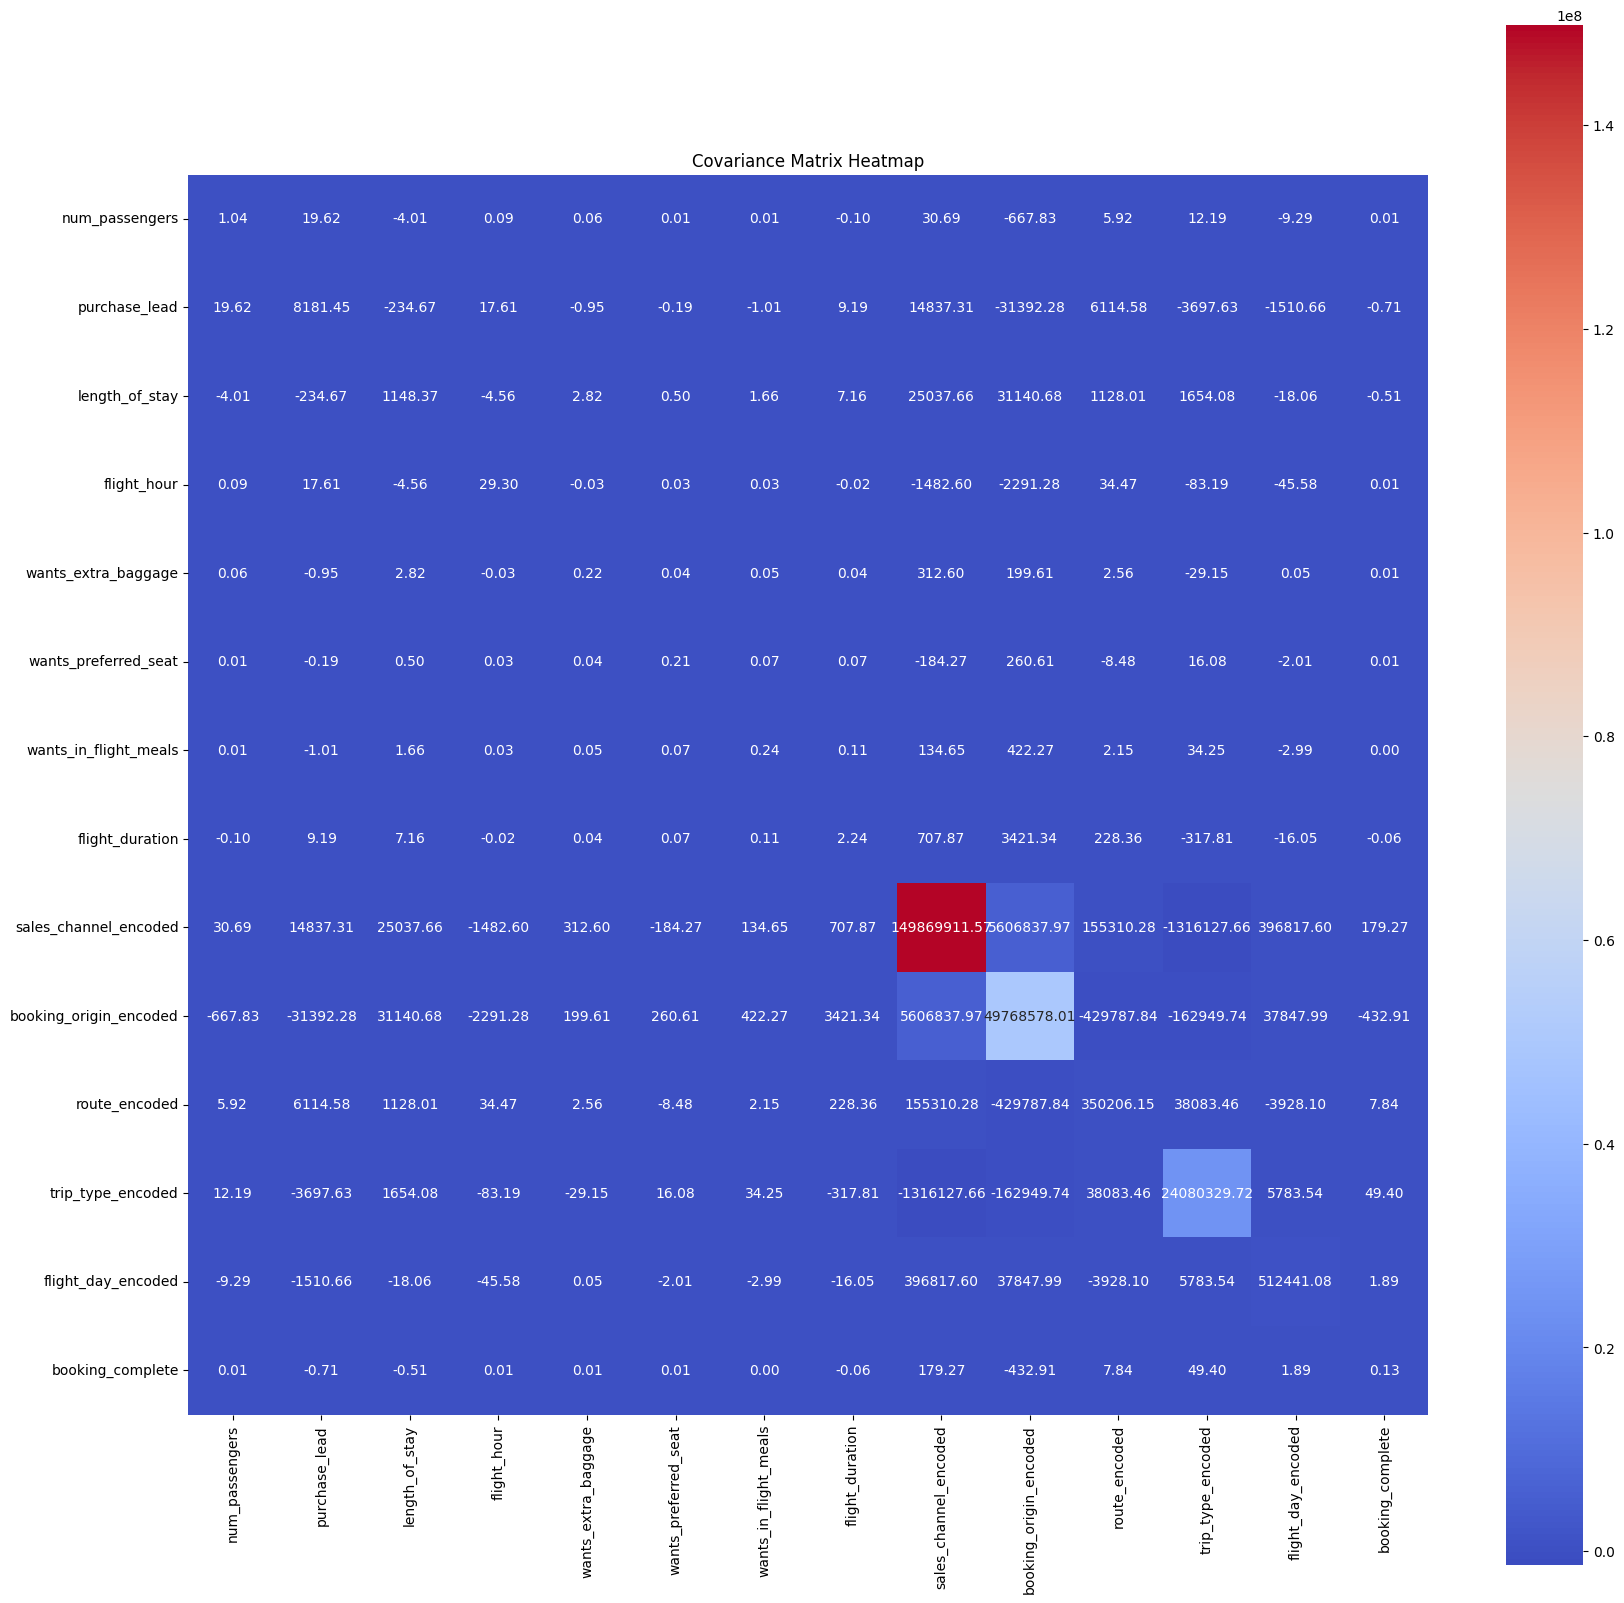

In [103]:

plt.figure(figsize=(20, 20))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Covariance Matrix Heatmap')
plt.show()


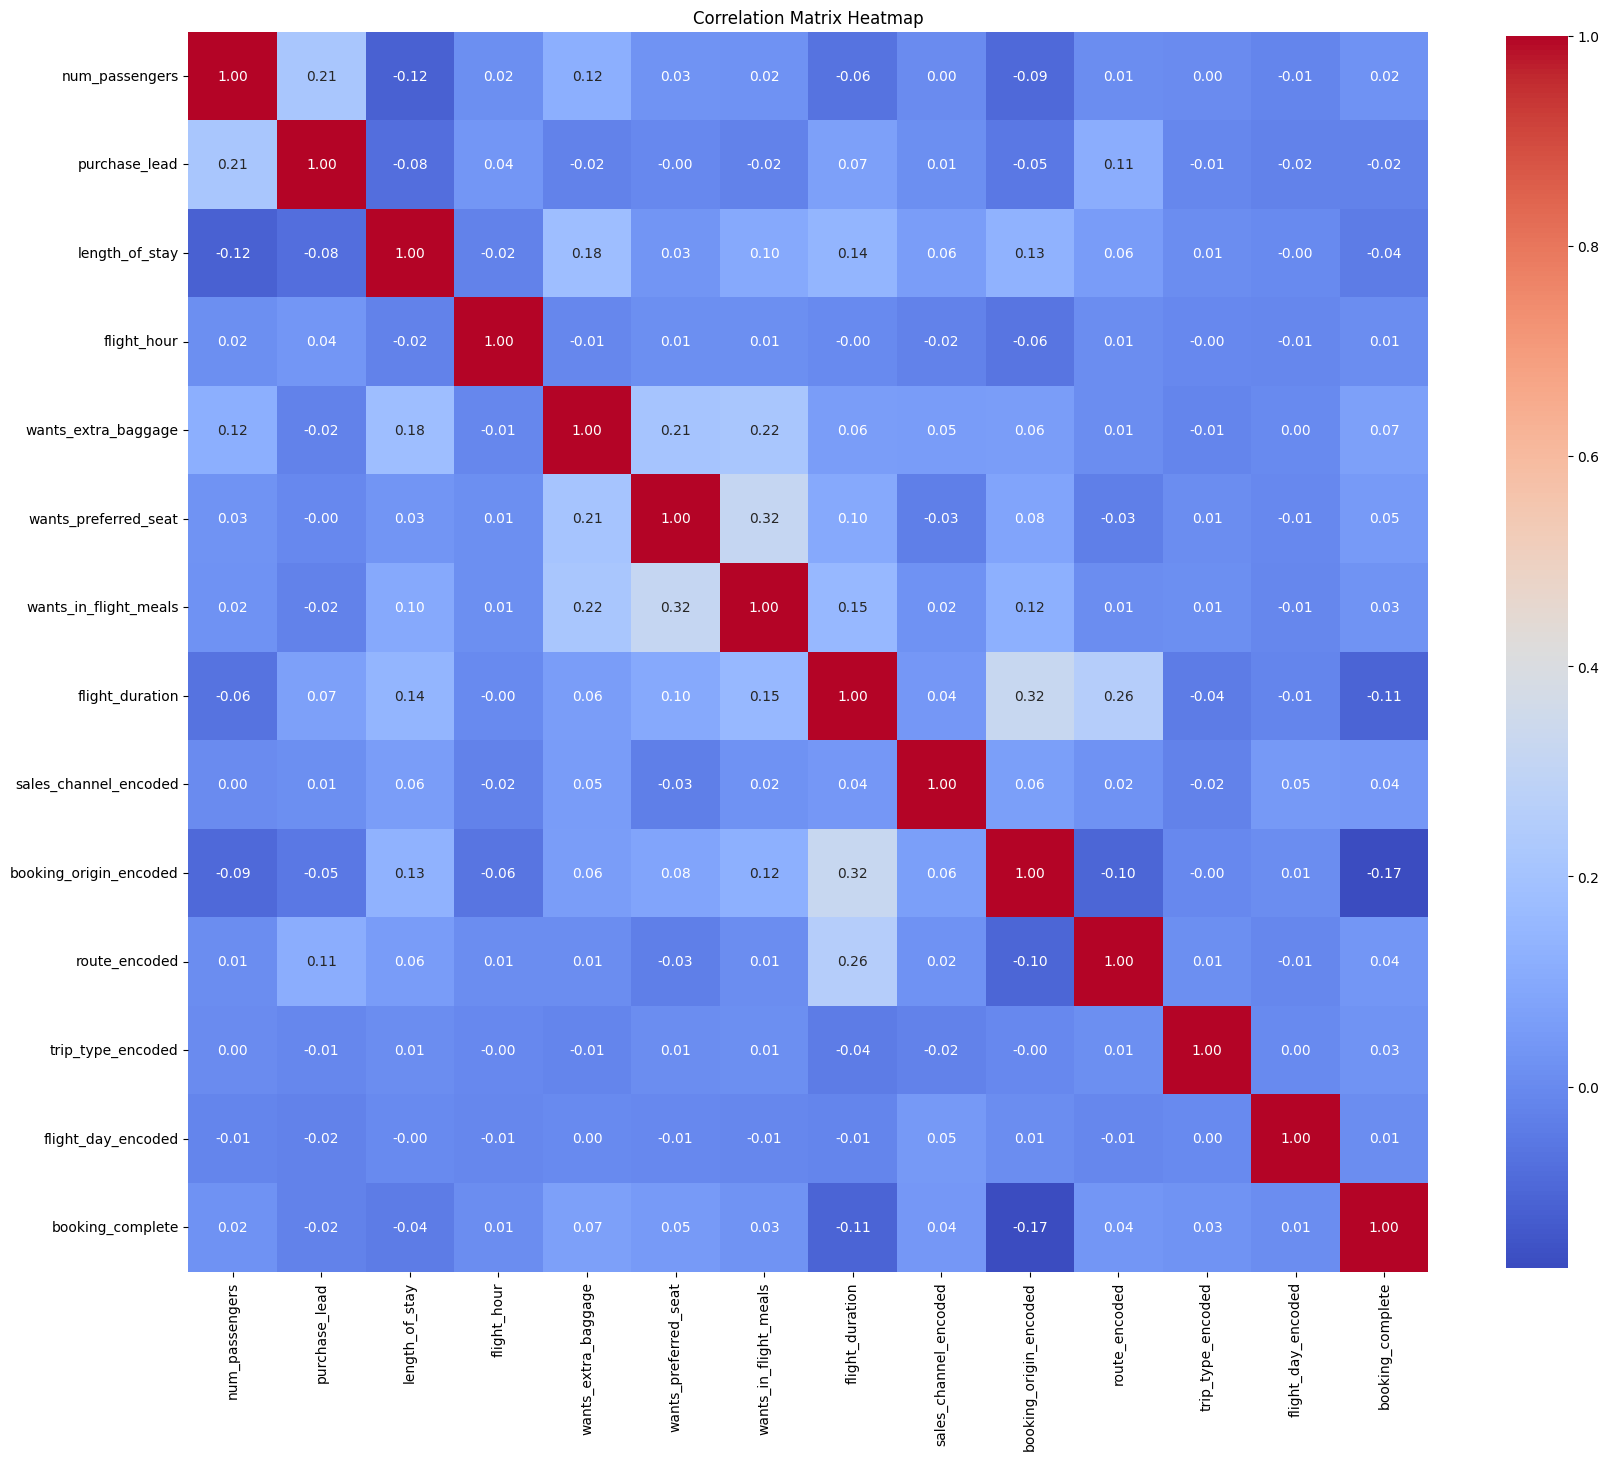

In [104]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()


booking_origin_encoded
17872    17872
7174      7174
4559      4559
3885      3885
3387      3387
2369      2369
2077      2077
2030      2030
1270      1270
1074      1074
1044      1044
456        456
388        388
304        304
295        295
266        266
173        173
167        167
132        132
57         114
84          84
73          73
36          72
59          59
58          58
9           54
51          51
8           48
46          46
44          44
42          42
40          40
32          32
1           27
27          27
25          25
12          24
7           21
18          18
6           18
17          17
2           16
15          15
5           15
14          14
4           12
3           12
Name: count, dtype: int64


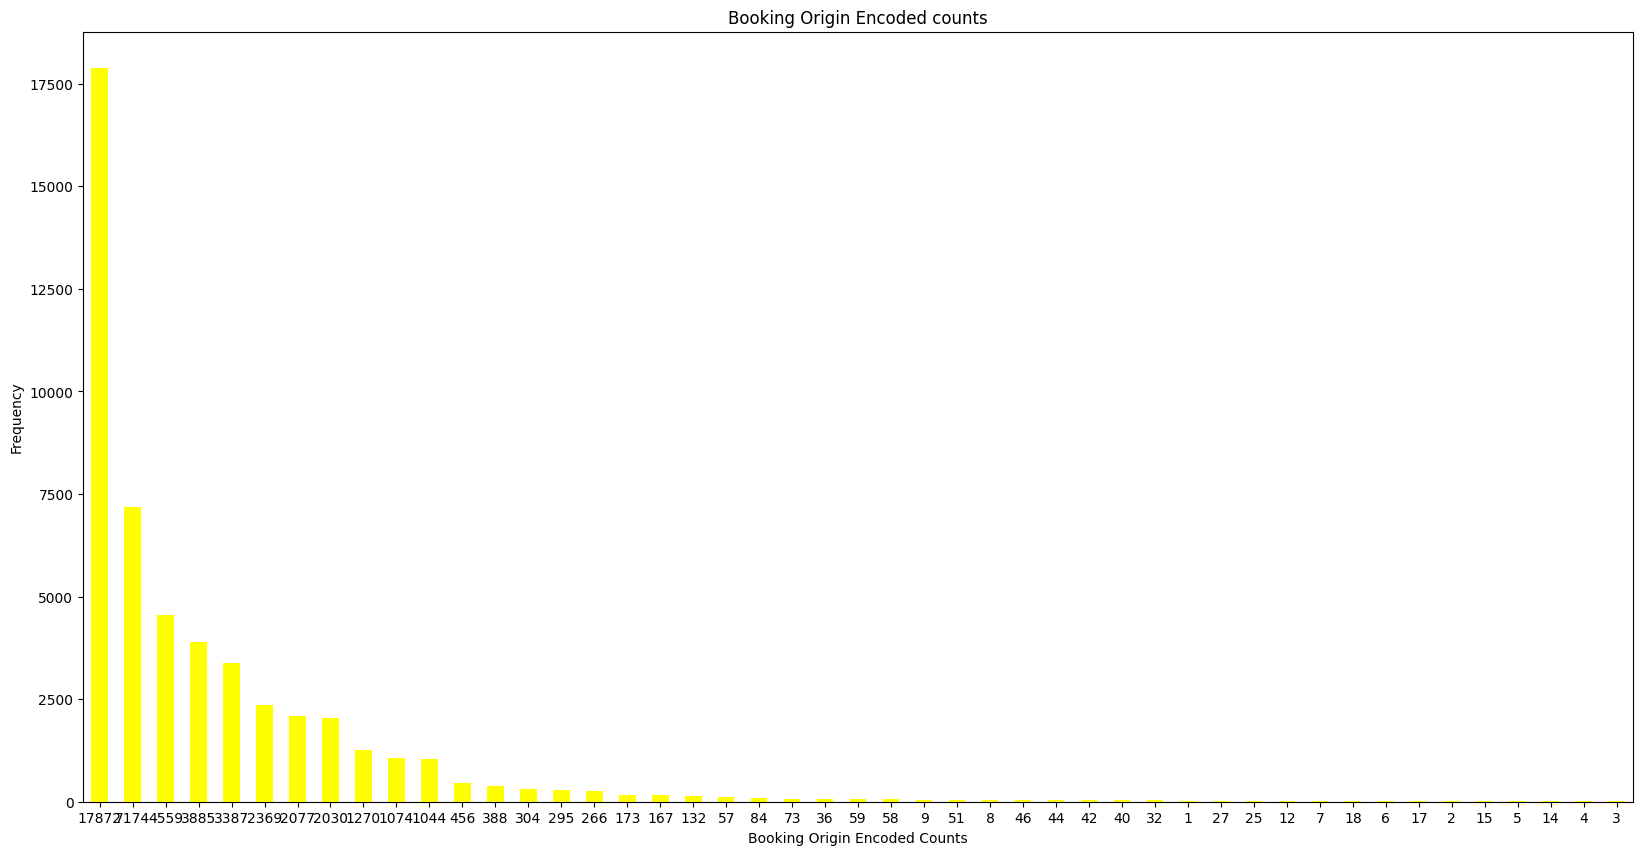

In [108]:
import matplotlib.pyplot as plt

# Get the value counts for 'booking_complete'
value_counts = df_encoded['booking_origin_encoded'].value_counts()
print(value_counts)
# Plotting
plt.figure(figsize=(20, 10))
value_counts.plot(kind='bar', color='yellow')
plt.title('Booking Origin Encoded counts')
plt.xlabel('Booking Origin Encoded Counts')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Adjust rotation for clarity
plt.show()


In [109]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_encoded.drop(columns=['booking_complete'])  # Features
y = df_encoded['booking_complete']  # Target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Applying PCA.

In [110]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=5)  # Adjust the number of components as needed

# Fit and transform the training data
X_train_reduced = pca.fit_transform(X_train)

# Transform the test data
X_test_reduced = pca.transform(X_test)


#Model Training

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Logistic Regression on the train set.

In [112]:
# Initialize the model
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(X_train_reduced, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_reduced)

# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Performance:
Accuracy: 0.8504666666666667
[[12757     0]
 [ 2243     0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12757
           1       0.00      0.00      0.00      2243

    accuracy                           0.85     15000
   macro avg       0.43      0.50      0.46     15000
weighted avg       0.72      0.85      0.78     15000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


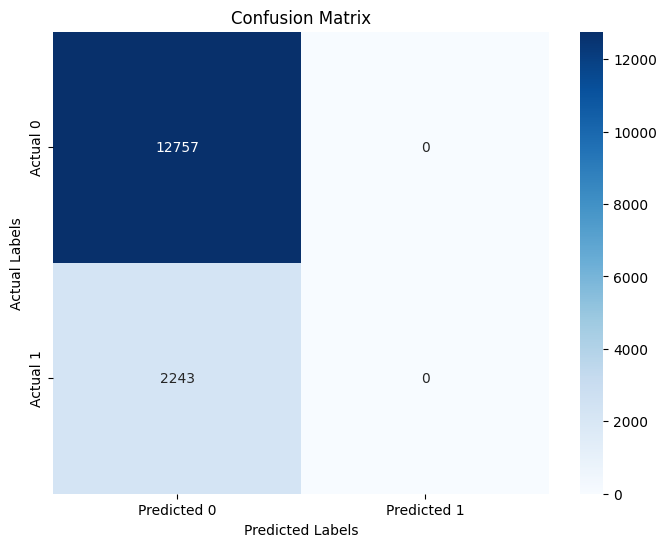

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


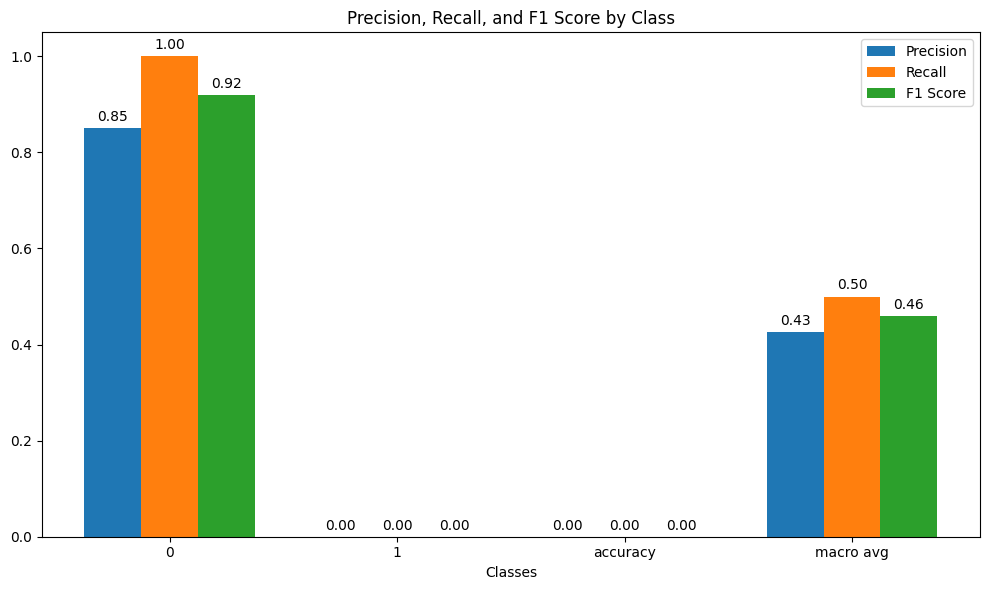

In [125]:
from sklearn.metrics import classification_report
import numpy as np

# Get classification report with zero_division parameter
report = classification_report(y_test, y_pred_logistic, output_dict=True, zero_division=0)

# Extract precision, recall, and f1-score
labels = list(report.keys())[:-1]  # Exclude 'accuracy'
precision = []
recall = []
f1_score = []

for label in labels:
    if isinstance(report[label], dict):  # Check if it's a dictionary
        precision.append(report[label]['precision'])
        recall.append(report[label]['recall'])
        f1_score.append(report[label]['f1-score'])
    else:
        # If it's not a dict, it means the metrics are not available; append 0 or NaN
        precision.append(0)
        recall.append(0)
        f1_score.append(0)

# Set up the bar plot
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, precision, width, label='Precision')
bars2 = ax.bar(x, recall, width, label='Recall')
bars3 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Classes')
ax.set_title('Precision, Recall, and F1 Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels on the bars
for bars in (bars1, bars2, bars3):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


Random Forest Model

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X_train_reduced, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_reduced)

# Evaluate the model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.8206
Confusion Matrix:
 [[11805   952]
 [ 1739   504]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     12757
           1       0.35      0.22      0.27      2243

    accuracy                           0.82     15000
   macro avg       0.61      0.58      0.59     15000
weighted avg       0.79      0.82      0.80     15000



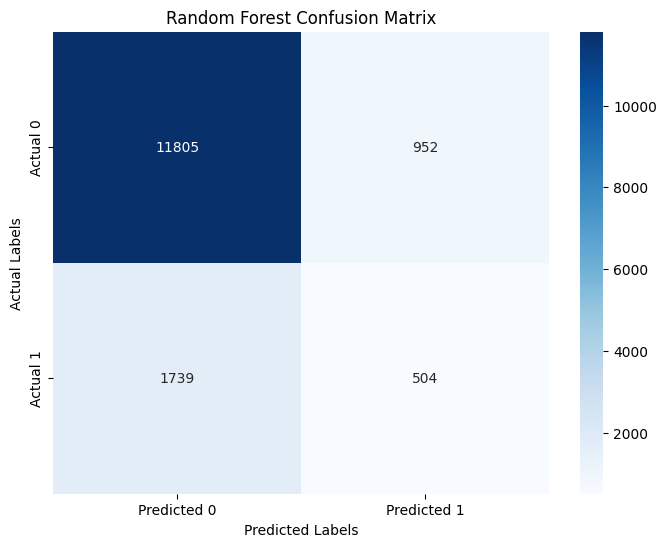

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


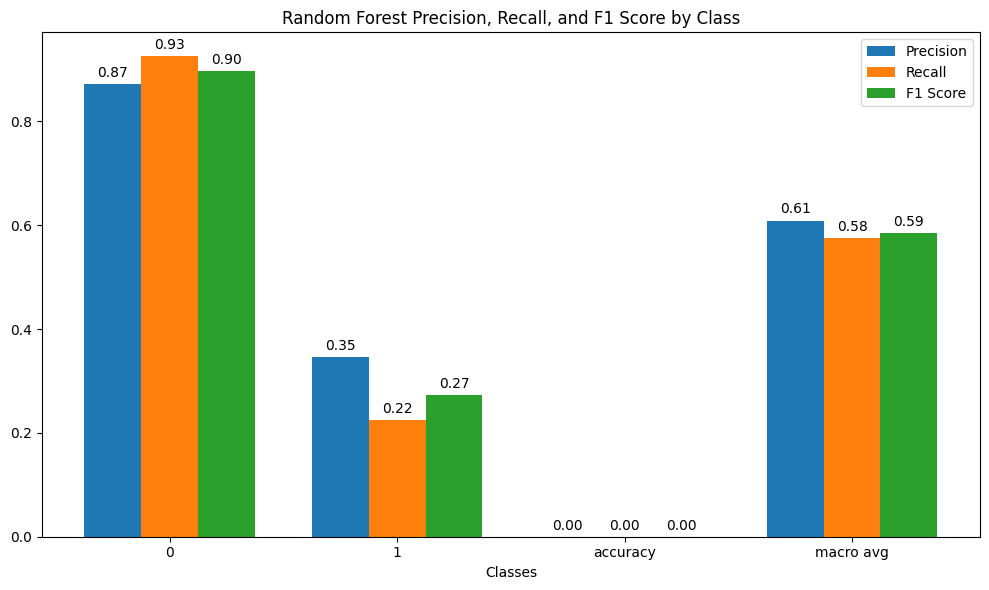

In [128]:
# Get classification report with zero_division parameter
report_rf = classification_report(y_test, y_pred_rf, output_dict=True, zero_division=0)

# Extract precision, recall, and f1-score
labels_rf = list(report_rf.keys())[:-1]  # Exclude 'accuracy'
precision_rf = []
recall_rf = []
f1_score_rf = []

for label in labels_rf:
    if isinstance(report_rf[label], dict):
        precision_rf.append(report_rf[label]['precision'])
        recall_rf.append(report_rf[label]['recall'])
        f1_score_rf.append(report_rf[label]['f1-score'])
    else:
        precision_rf.append(0)
        recall_rf.append(0)
        f1_score_rf.append(0)

# Set up the bar plot
x_rf = np.arange(len(labels_rf))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1_rf = ax.bar(x_rf - width, precision_rf, width, label='Precision')
bars2_rf = ax.bar(x_rf, recall_rf, width, label='Recall')
bars3_rf = ax.bar(x_rf + width, f1_score_rf, width, label='F1 Score')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Classes')
ax.set_title('Random Forest Precision, Recall, and F1 Score by Class')
ax.set_xticks(x_rf)
ax.set_xticklabels(labels_rf)
ax.legend()

# Add value labels on the bars
for bars in (bars1_rf, bars2_rf, bars3_rf):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


RF with Hyper-parameter Tuning.

In [114]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

# Initialize the model
rf_model = RandomForestClassifier()

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)

# Fit the model
grid_search.fit(X_train_reduced, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 200}


In [116]:
from sklearn.decomposition import PCA

# Assume you already performed PCA on X_train
pca = PCA(n_components=5)  # Use the same number of components
X_train_reduced = pca.fit_transform(X_train)

# Now transform X_test using the same PCA instance
X_test_reduced = pca.transform(X_test)


In [118]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_reduced)


In [119]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[12723    34]
 [ 2217    26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     12757
           1       0.43      0.01      0.02      2243

    accuracy                           0.85     15000
   macro avg       0.64      0.50      0.47     15000
weighted avg       0.79      0.85      0.78     15000



In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions with the best model
y_pred = best_rf_model.predict(X_test_reduced)

# Evaluate the model
print("Best Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Random Forest Performance:
Accuracy: 0.8499333333333333
Confusion Matrix:
 [[12723    34]
 [ 2217    26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     12757
           1       0.43      0.01      0.02      2243

    accuracy                           0.85     15000
   macro avg       0.64      0.50      0.47     15000
weighted avg       0.79      0.85      0.78     15000



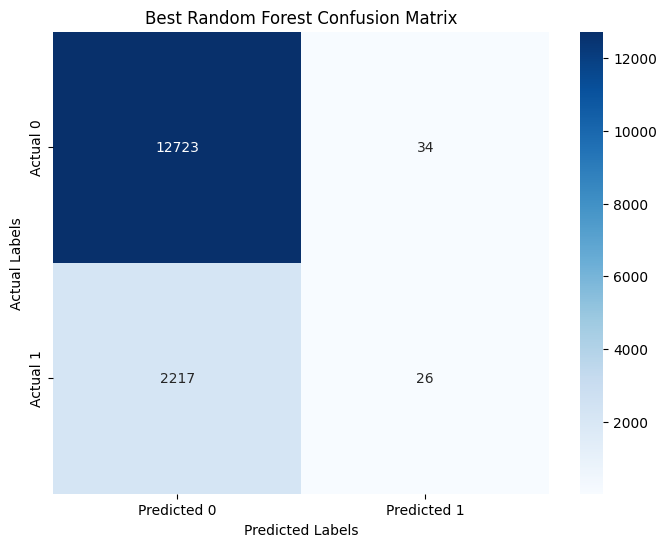

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm_best_rf = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Best Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


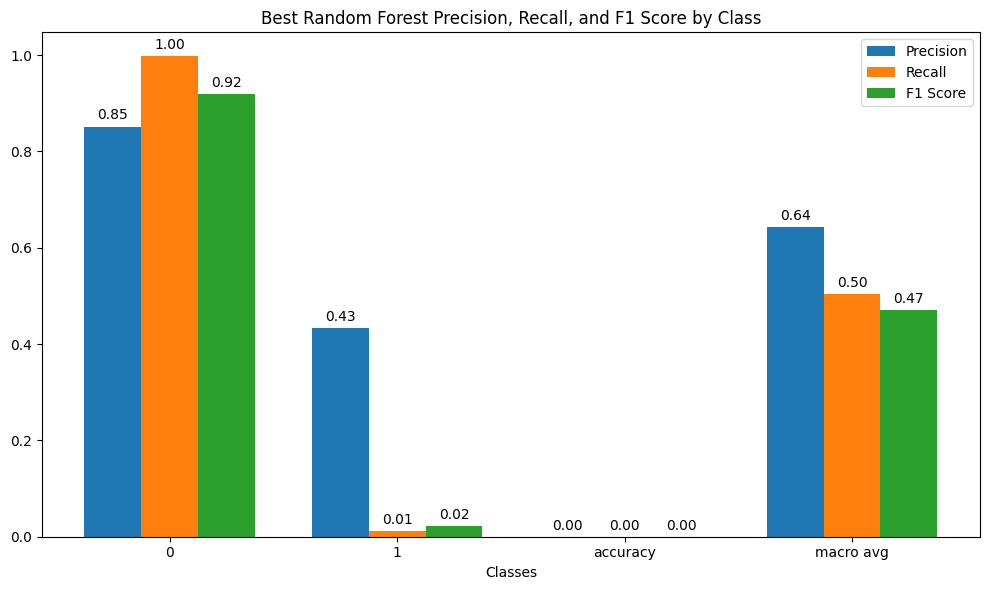

In [131]:
# Get classification report with zero_division parameter
report_best_rf = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Extract precision, recall, and f1-score
labels_best_rf = list(report_best_rf.keys())[:-1]  # Exclude 'accuracy'
precision_best_rf = []
recall_best_rf = []
f1_score_best_rf = []

for label in labels_best_rf:
    if isinstance(report_best_rf[label], dict):
        precision_best_rf.append(report_best_rf[label]['precision'])
        recall_best_rf.append(report_best_rf[label]['recall'])
        f1_score_best_rf.append(report_best_rf[label]['f1-score'])
    else:
        precision_best_rf.append(0)
        recall_best_rf.append(0)
        f1_score_best_rf.append(0)

# Set up the bar plot
x_best_rf = np.arange(len(labels_best_rf))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1_best_rf = ax.bar(x_best_rf - width, precision_best_rf, width, label='Precision')
bars2_best_rf = ax.bar(x_best_rf, recall_best_rf, width, label='Recall')
bars3_best_rf = ax.bar(x_best_rf + width, f1_score_best_rf, width, label='F1 Score')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Classes')
ax.set_title('Best Random Forest Precision, Recall, and F1 Score by Class')
ax.set_xticks(x_best_rf)
ax.set_xticklabels(labels_best_rf)
ax.legend()

# Add value labels on the bars
for bars in (bars1_best_rf, bars2_best_rf, bars3_best_rf):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
